# Insurance Claim Fraud Detection

### Problem Statement:

##### Business case:

###### Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.

##### In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

##### Note: Use the link below to reach to your dataset.

Downlaod Files:

https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

### . Importing required libraries for performing EDA, Data Wrangling and data cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

C:\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1000
No of Columns: 40


months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                   NaN             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

## Statistical Analysis

##### Since dataset is large, Let check for any entry which is repeated or duplicated in dataset.

In [5]:
df.duplicated('policy_number').sum()

0

#### Let check if any whitespace, 'NA' or '-' exist in dataset.

In [6]:
df.isin([' ','NA','-']).sum().any()

False

In [7]:
df.isin(['?']).sum().any()

True

#### Let replace '?' with np.NaN

In [8]:
df=df.replace('?',np.NaN)

## Missing value check

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
authorities_contacted                    91             9.1
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
total_claim_amount                        0             0.0
injury_claim                            

#### Comment :
    
    
 . 'property_damage','police_report_available','collision_type' contain missing values.

 . _c39 columns with 100 % null value. We gone drop it.
    
 . Other missing value feature are categorical in nature. We gone impute them with mode of that particular category.


### Missing value imputation

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [11]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

### Missing value check after imputation

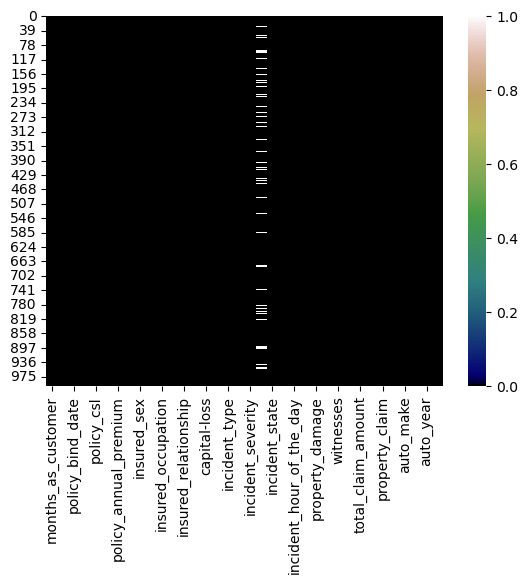

In [12]:
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

### Something details on Policy_csl column :
    
    
 . Combined single limit (CSL): CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.
    
 . In this dataset Policy_csl columns have numerical data separated by '/', resulting into object datatype.

 . We will split this column into two CSL columns for person and accident.
    

In [13]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [14]:
df.drop("policy_csl",axis=1,inplace=True)

### We have two feature here with datetime datatypes. We gone split them in terms of date,month and year.

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [17]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [18]:
df.drop(['incident_year'],axis=1,inplace=True)

#### We have one column name as 'auto_year' which depict year from which Automobile in operational on road. In simple word Automobile age. Here we will do some simple feature engineering to create new columns with automobile age and drop eariler.

As incident year is 2015, we will use 2015 as base year for new column creation.

In [19]:
df['Automobile_Age']=2015 - df['auto_year']
df.drop("auto_year",axis=1,inplace=True)

### Spliting feature in categorical and numerical variable

In [20]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int32: ['policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month'], int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

### Statistical Matrix


In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [23]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [24]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64
insured_sex
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64
insured_education_level
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64
insured_occupation
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64
insured_hobbies
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking      

### Start exploring Target variable

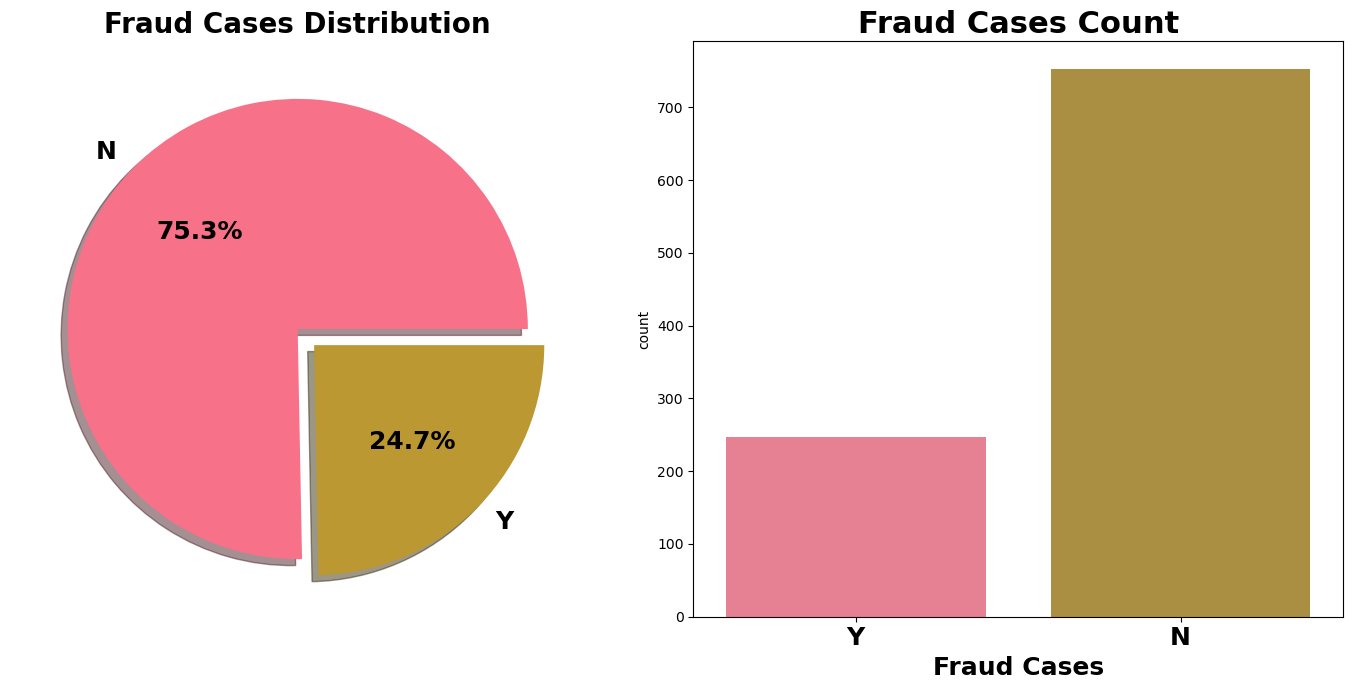

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

#### Observation:
    
    
 . Out of all cases around 24.7 % cases are Fraud.

 .'fraud_reported' is our target variable to be predicted. From count plot we can say dataset is imbalanced in nature.

### Start Exploring target variable against Independent features to gain more insight.

#### Analysing Age vs Fraud

In [26]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


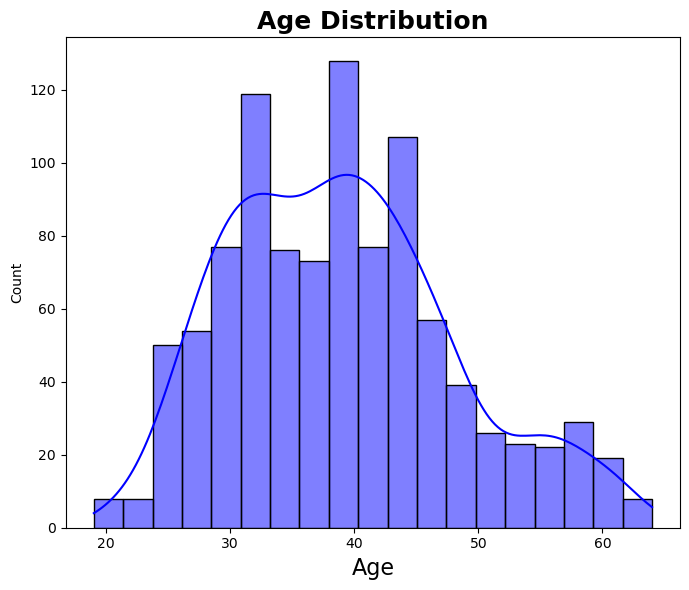

In [27]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='b')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [28]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

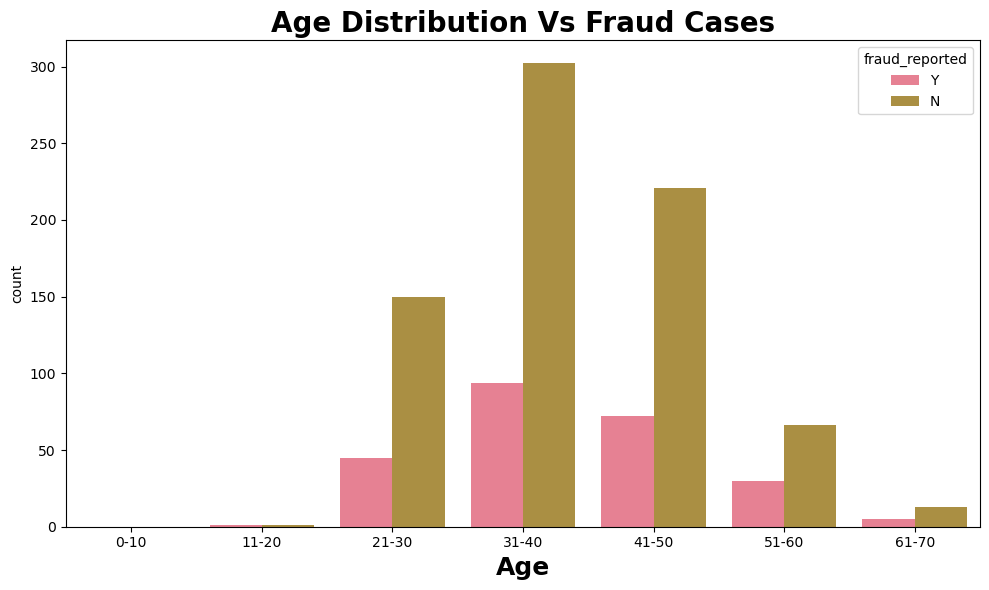

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

#### Observation:
    
 . Maximum fraud cases comes from people with age group of 31-50 year.


 . Very few cases in 60+ year old peoples.

## Policy State Vs Fraud cases

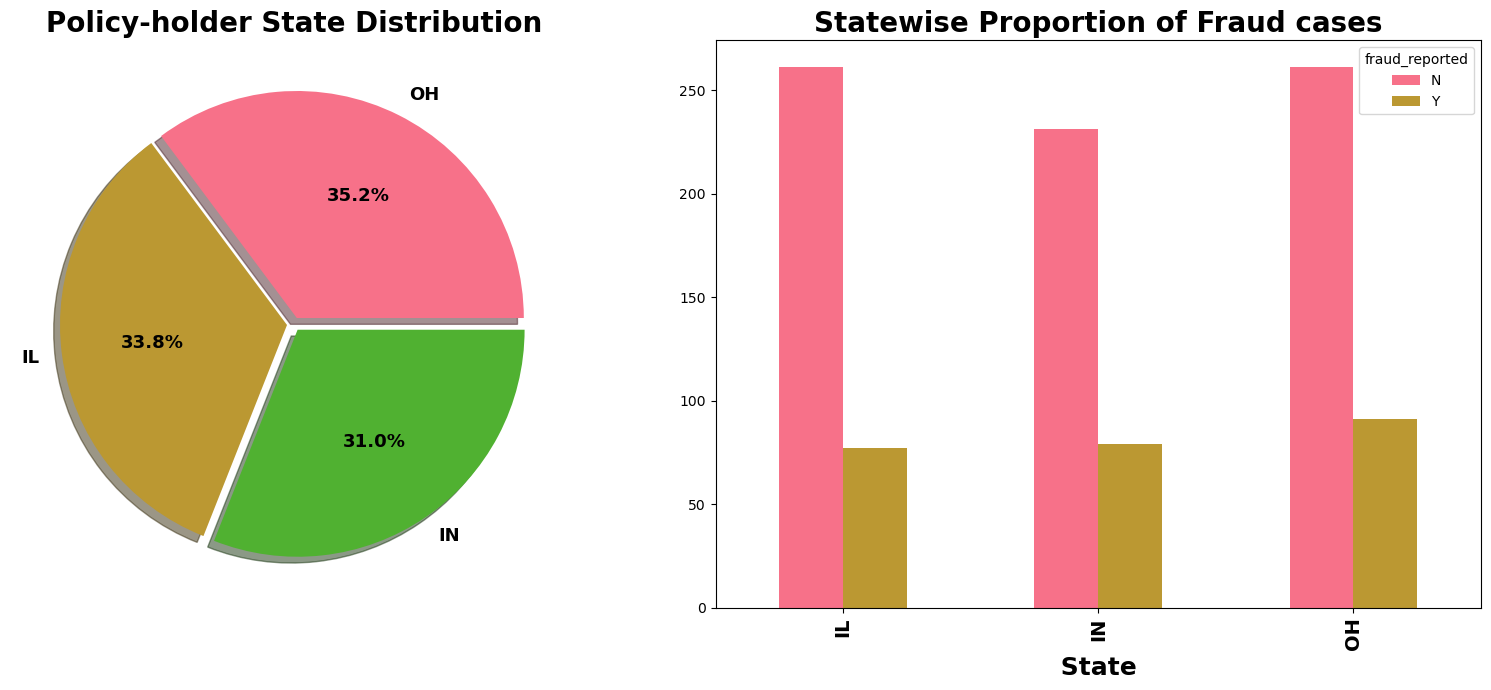

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
    
    
 . Almost same amout of cases come from each state.

 . Maximum fraud cases come from state of Ohio.

### Insured Gender VS Fraud cases

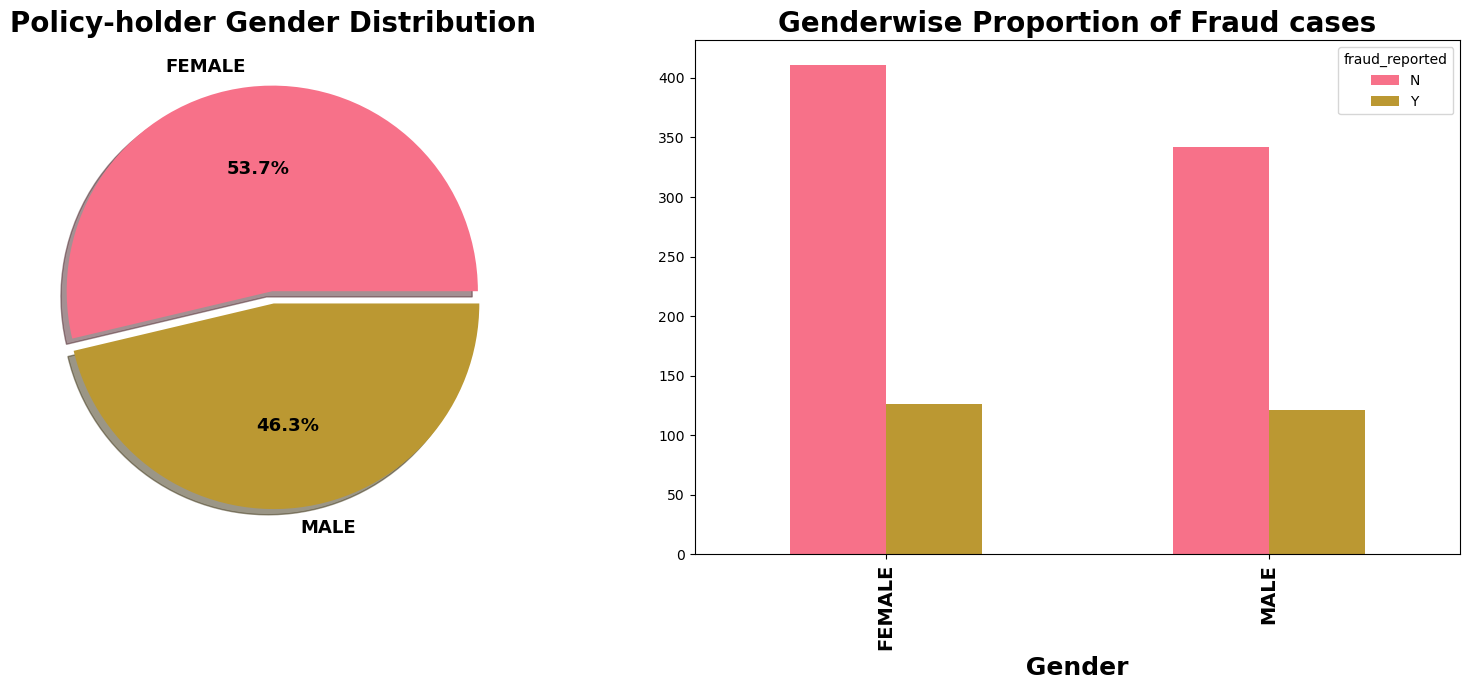

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

#### Comment :
    
    
 . Number of claims come from female is higher than which reported by male insured.

 . Almost same amount of fraud cases comes from same gender.

## Education_level vs Fraud cases

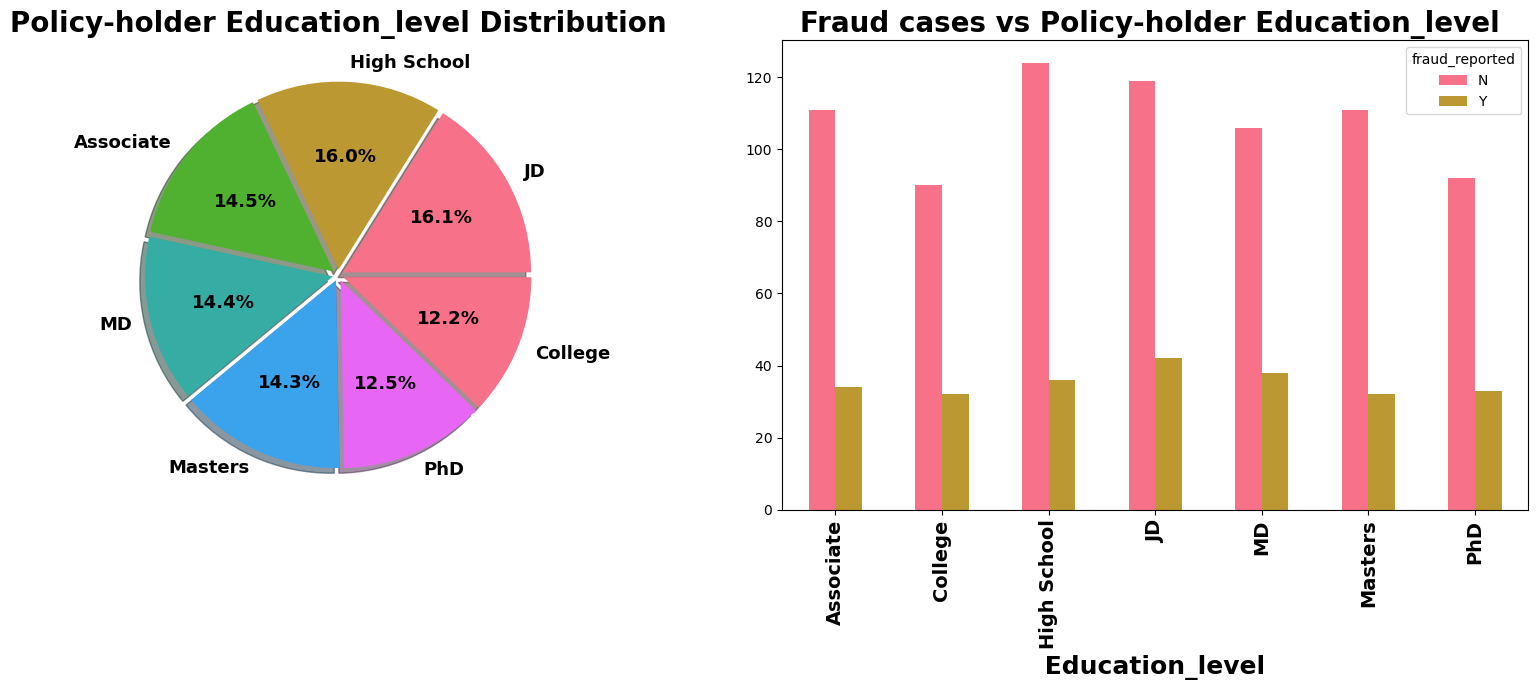

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

### Comment :
    
 . We can see tendency to make fraud claims has across every education backgroud, even in Masters,PhD. Education Level is not much important variable for us !!!



### Occupation of Insured Customers

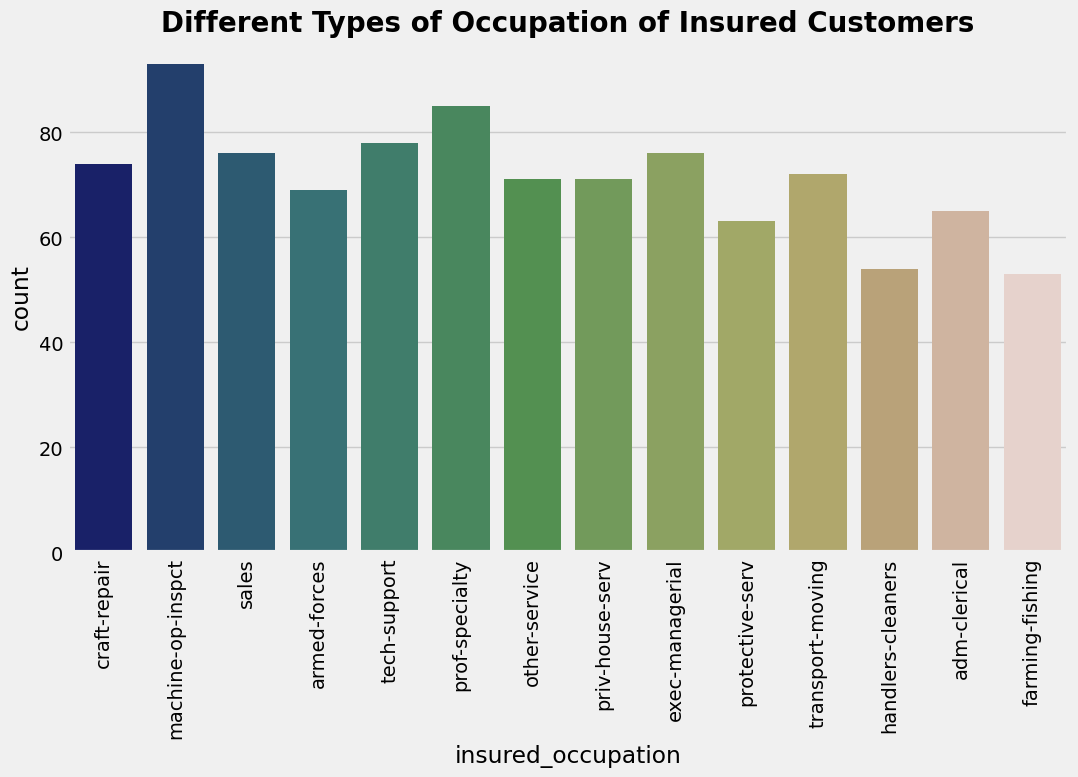

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(x=df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

###  Hobbies of Insured Customers


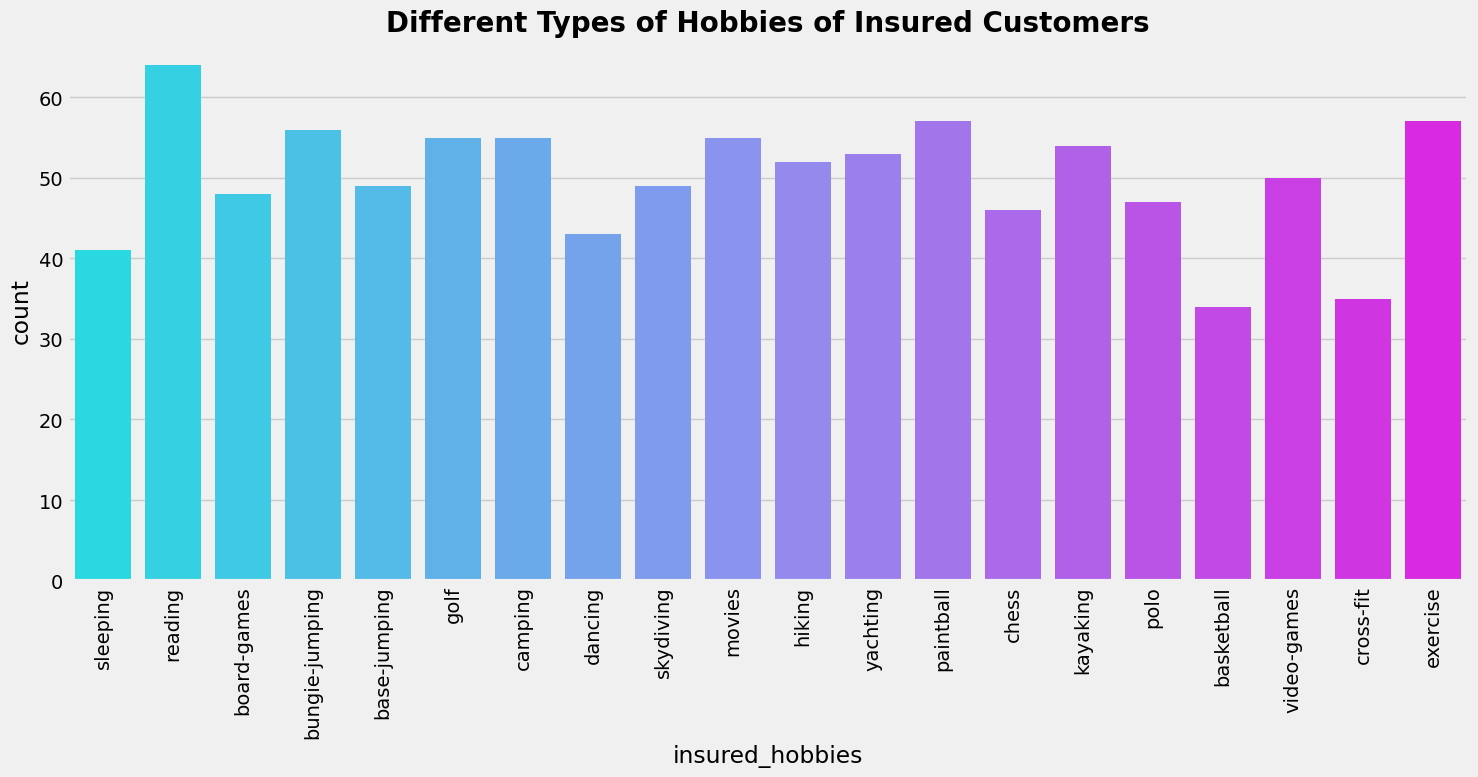

In [34]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(x=df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

### Different Types of Incidents Vs Fraud cases

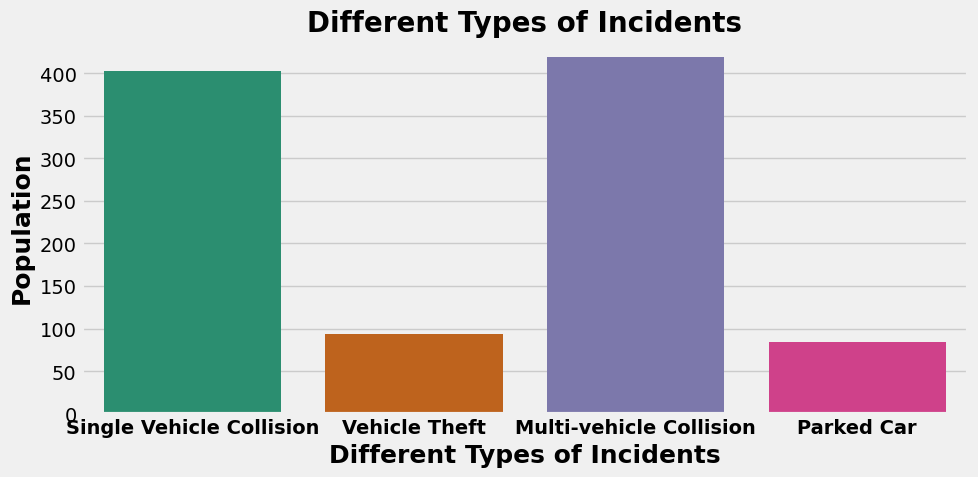

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(x=df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

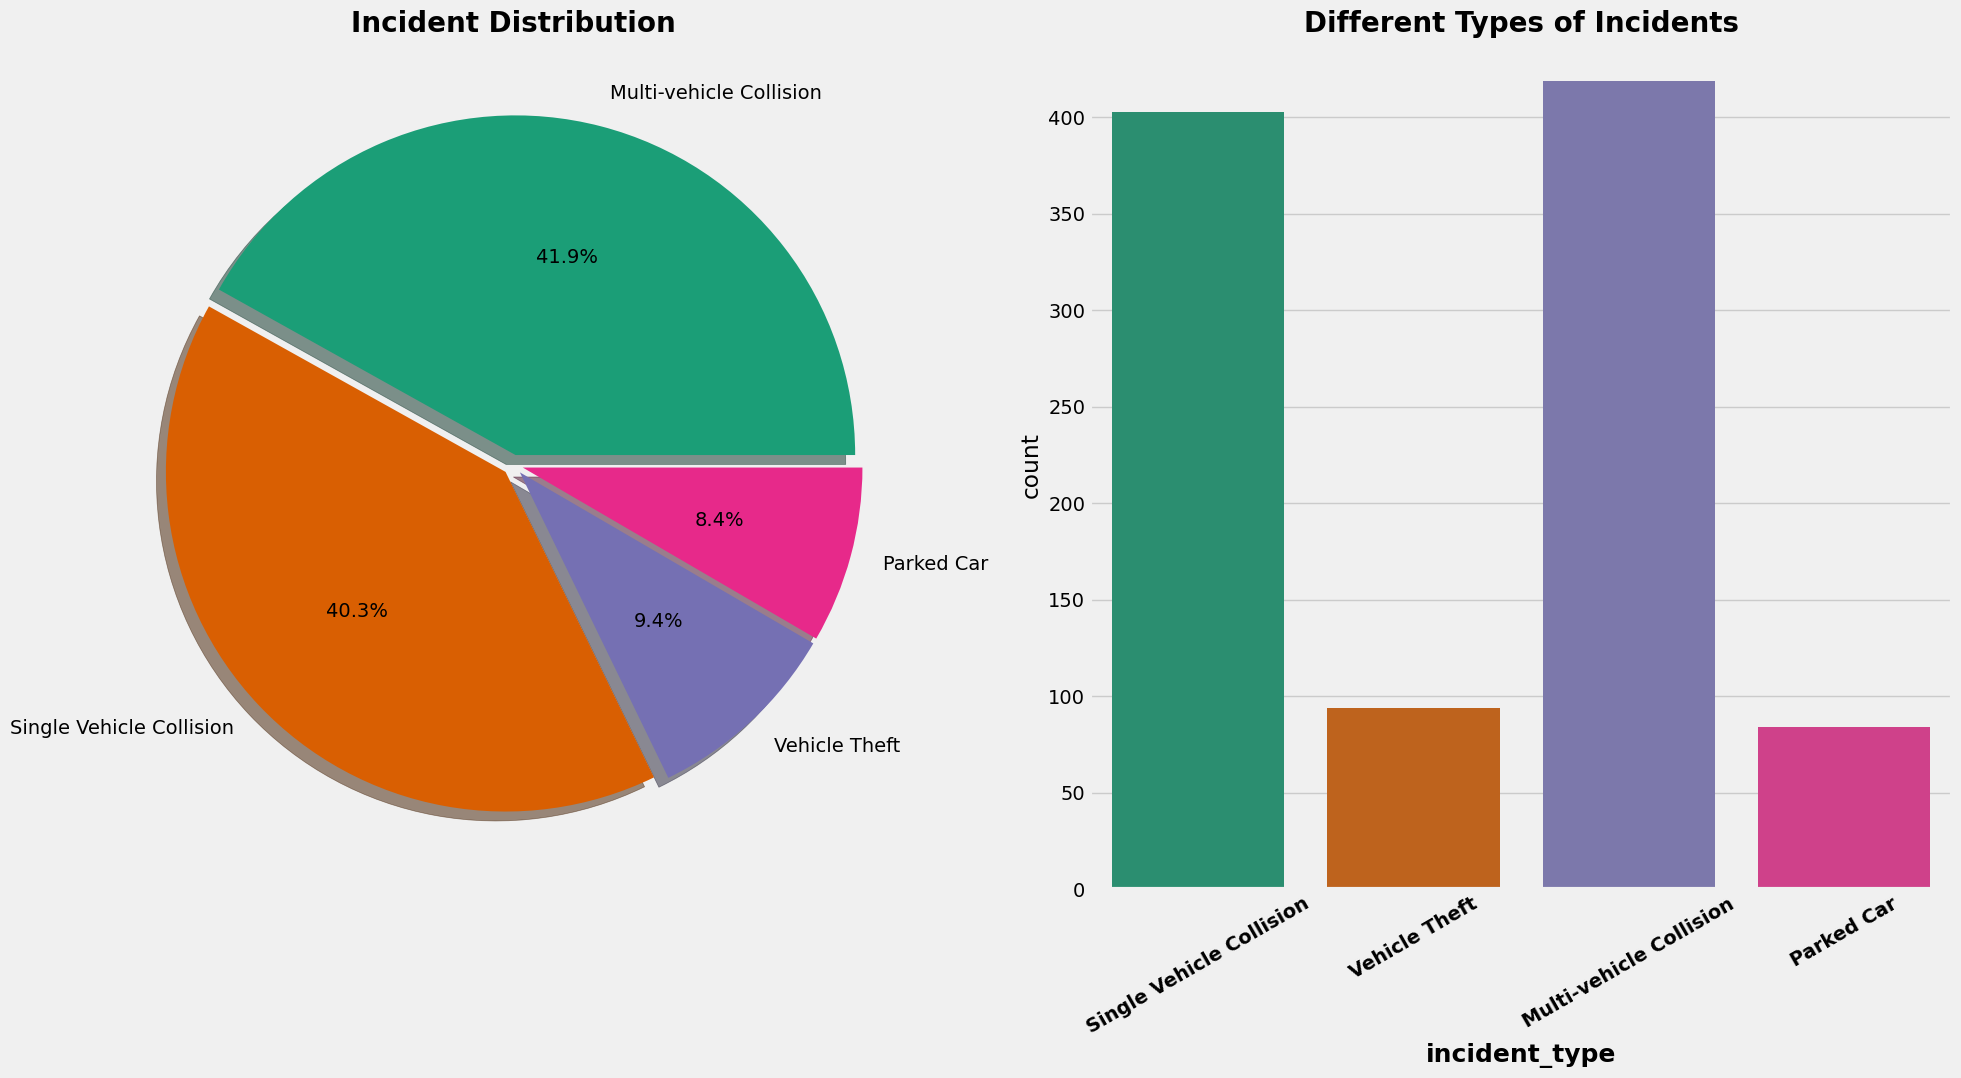

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

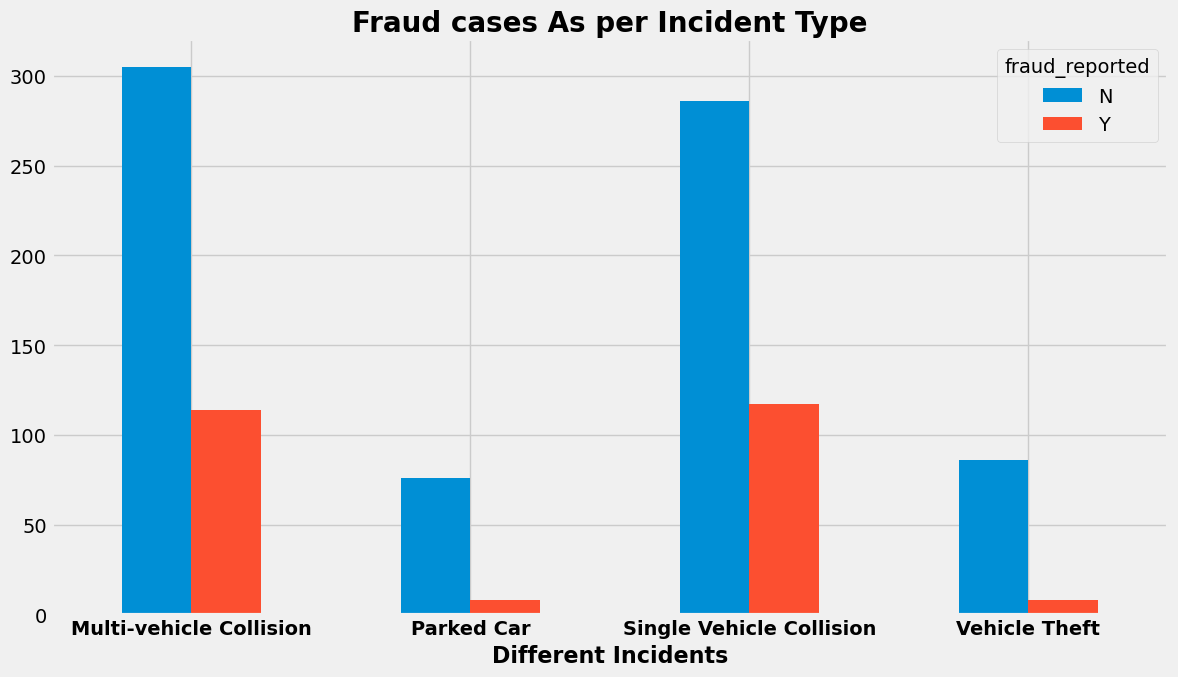

In [37]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### Observation :
    
    
 . Most of case comes from Multi-vehicle and single vehicle collision.

 . Some claims are due to automobile robbery.
    
 . One claim out of three claim is fraud in multi or single vehicle collision incident.


#### It will be interesting to figure out collision type and severity for different incident and corresponding fraud claim.

## Exploration of different Collision

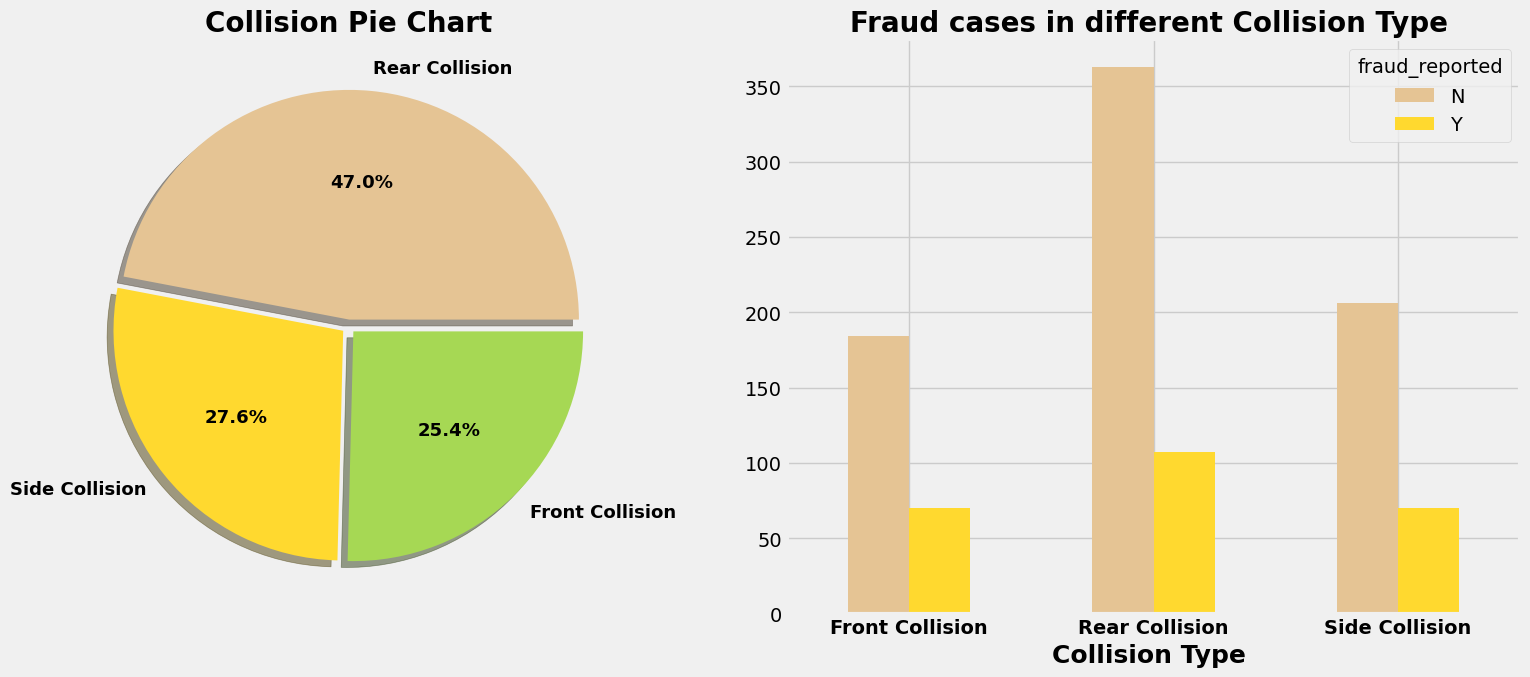

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

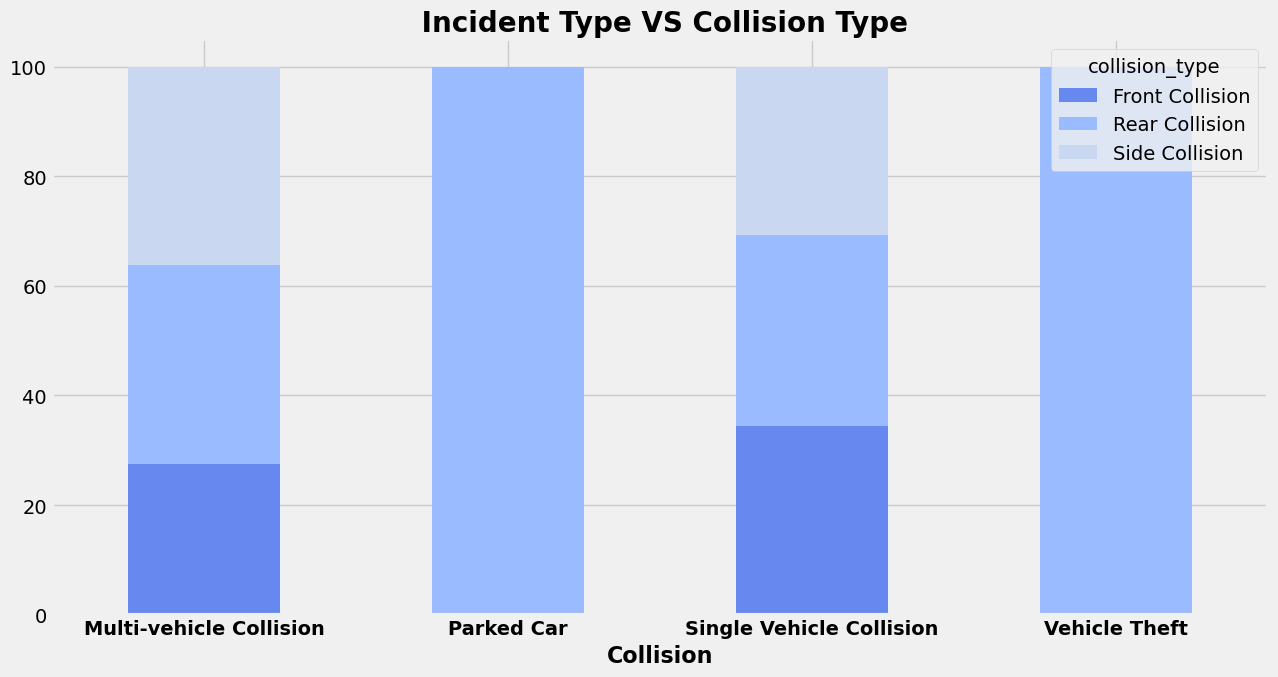

In [39]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

## Collision VS Incident Severity

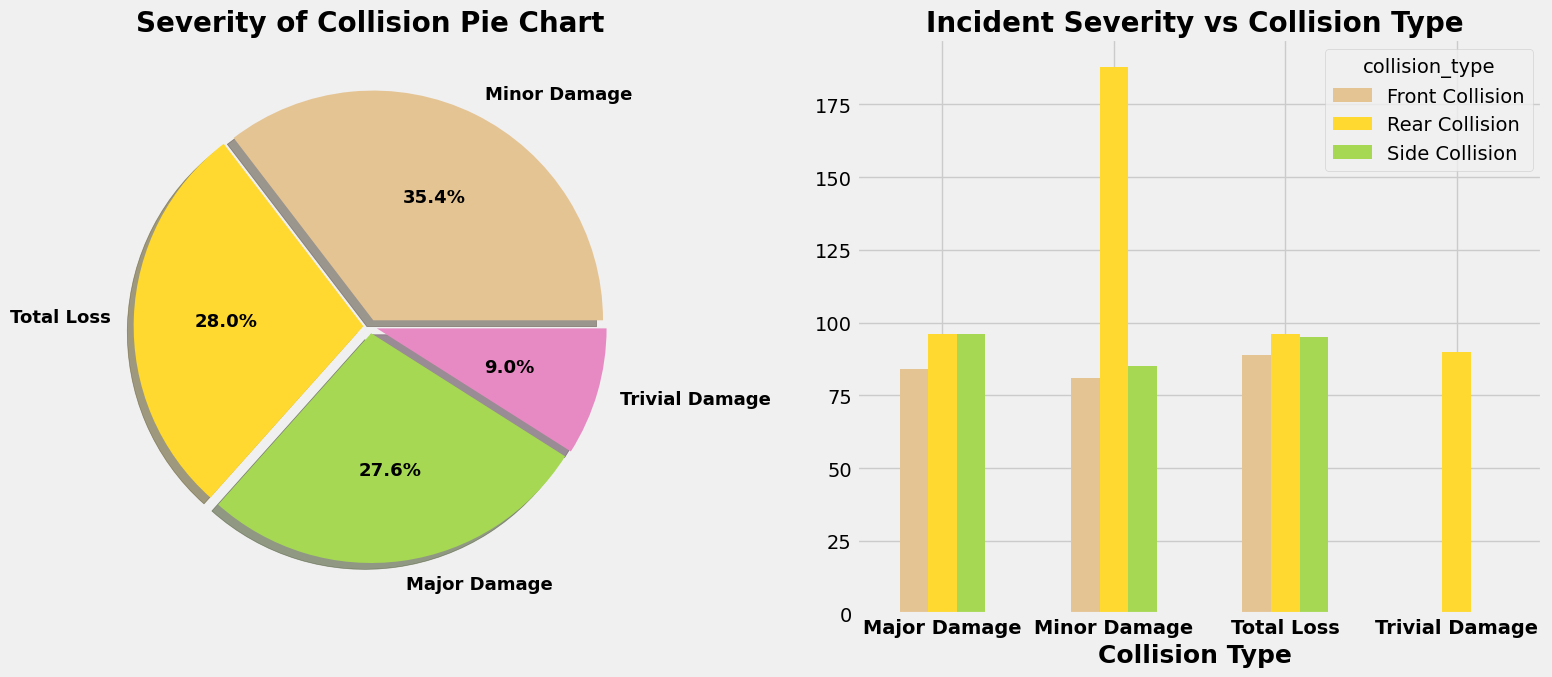

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

### Let check another plot of Incident Type VS Severity of collision to gain more insight.

In [41]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

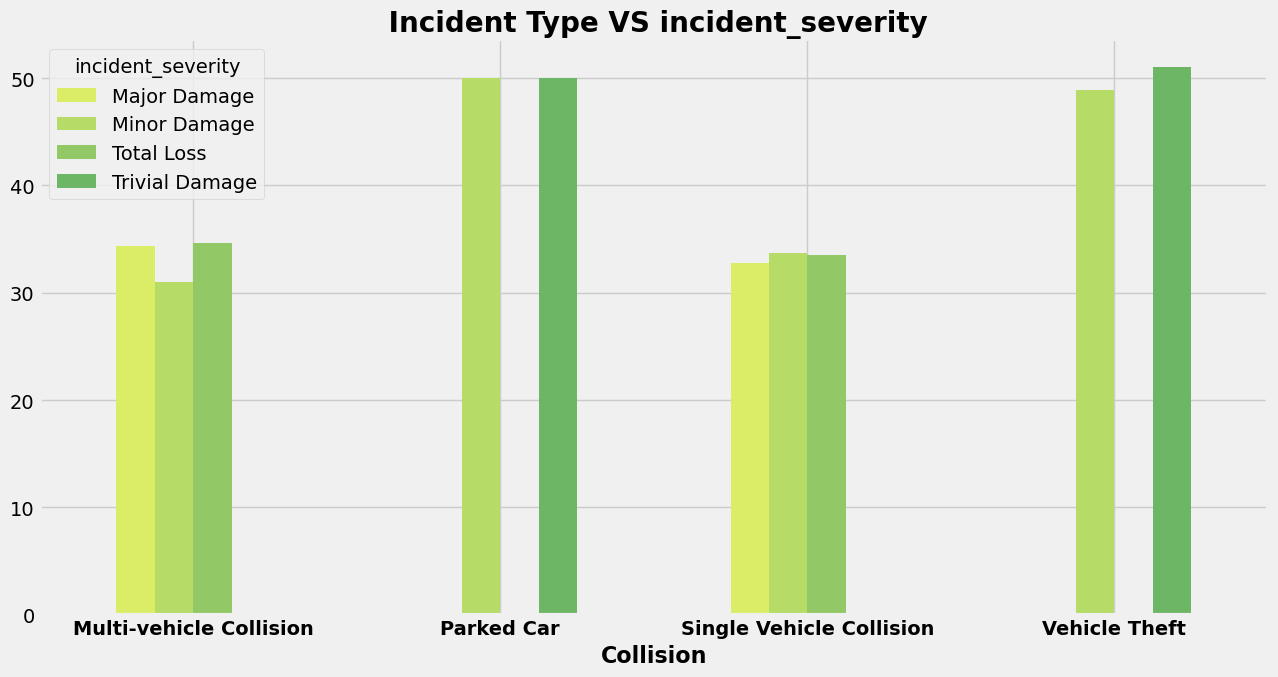

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

### It seem like incident Type is important variable for us. Now is time to dive deep to get more insight on incident type by visualise incident type with Numerical features.

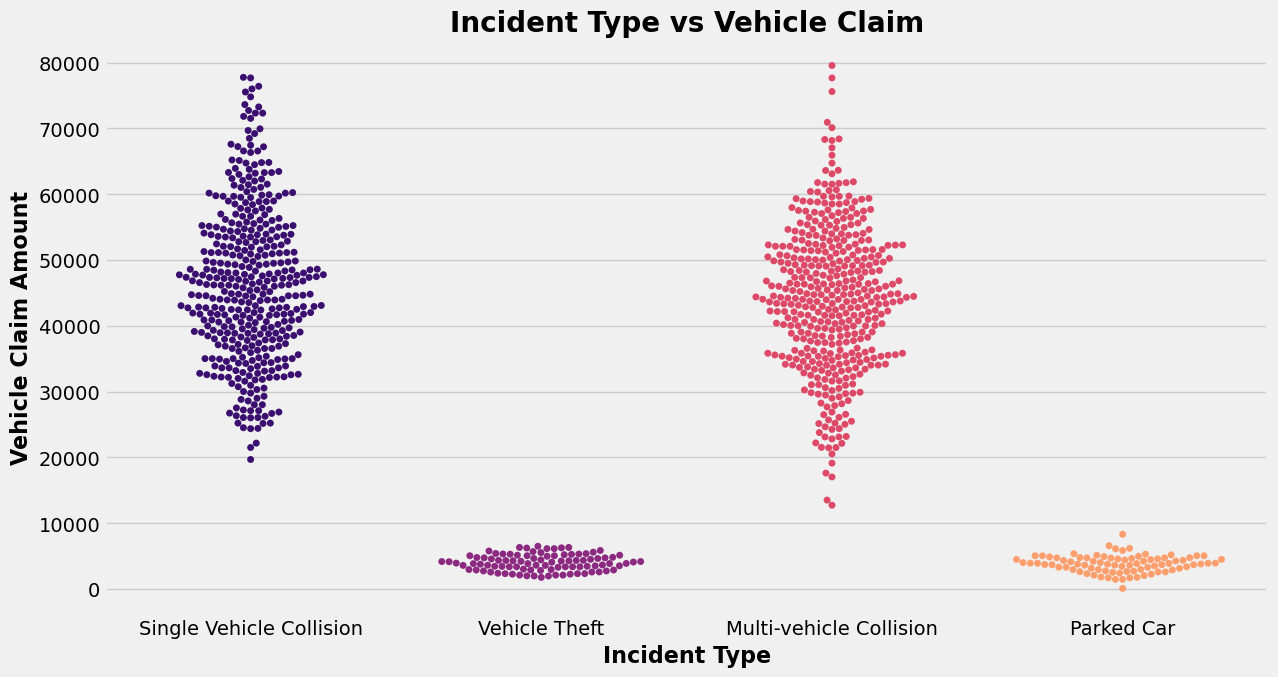

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.swarmplot(x=df['incident_type'], y=df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [44]:
print(df['incident_type'].dtype)
print(df['vehicle_claim'].dtype)
print(df['incident_type'].isnull().sum())
print(df['vehicle_claim'].isnull().sum())


object
int64
0
0


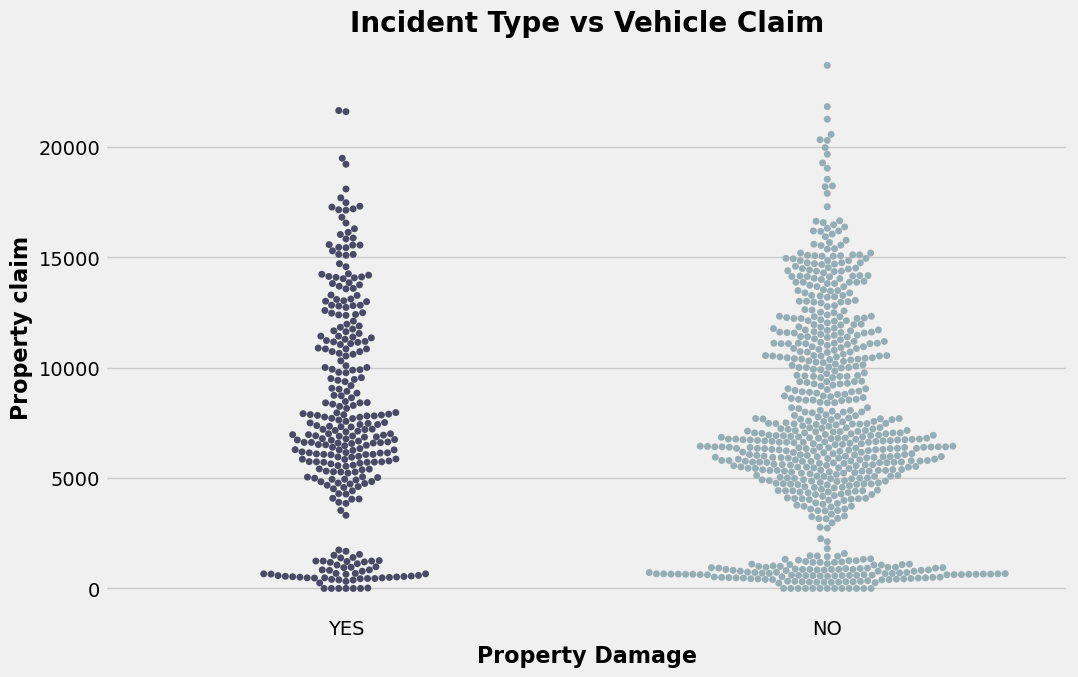

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x=df['property_damage'], y=df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

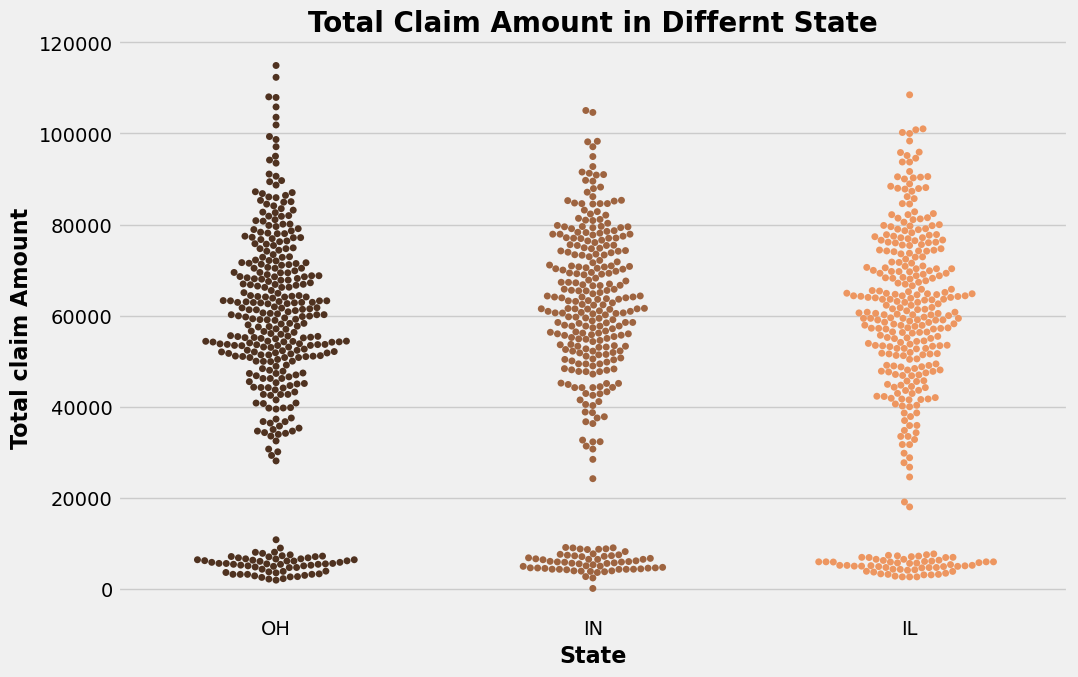

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(x=df['policy_state'], y=df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

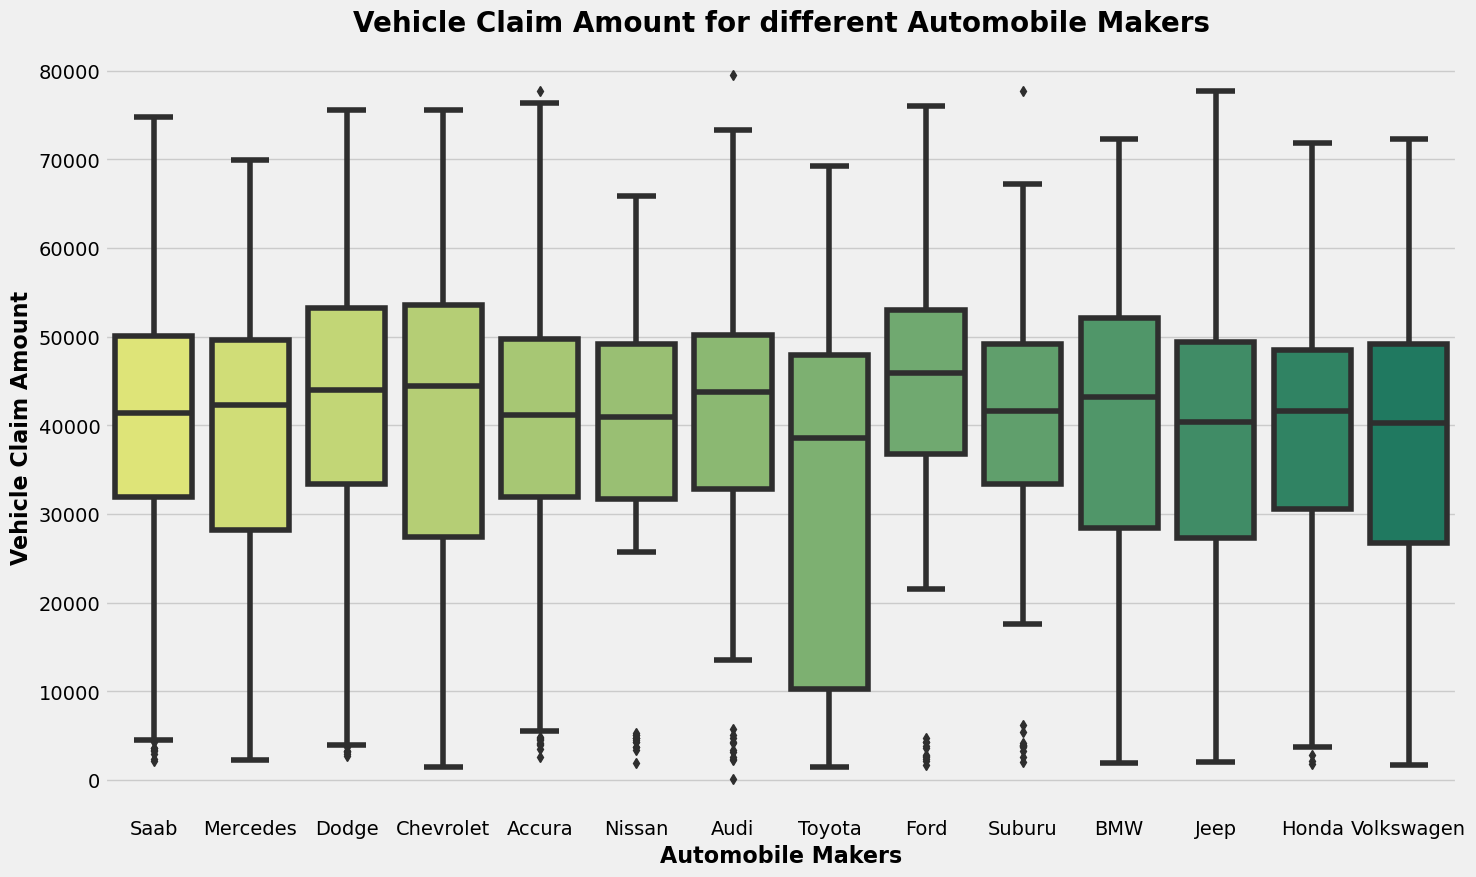

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(x=df['auto_make'], y=df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

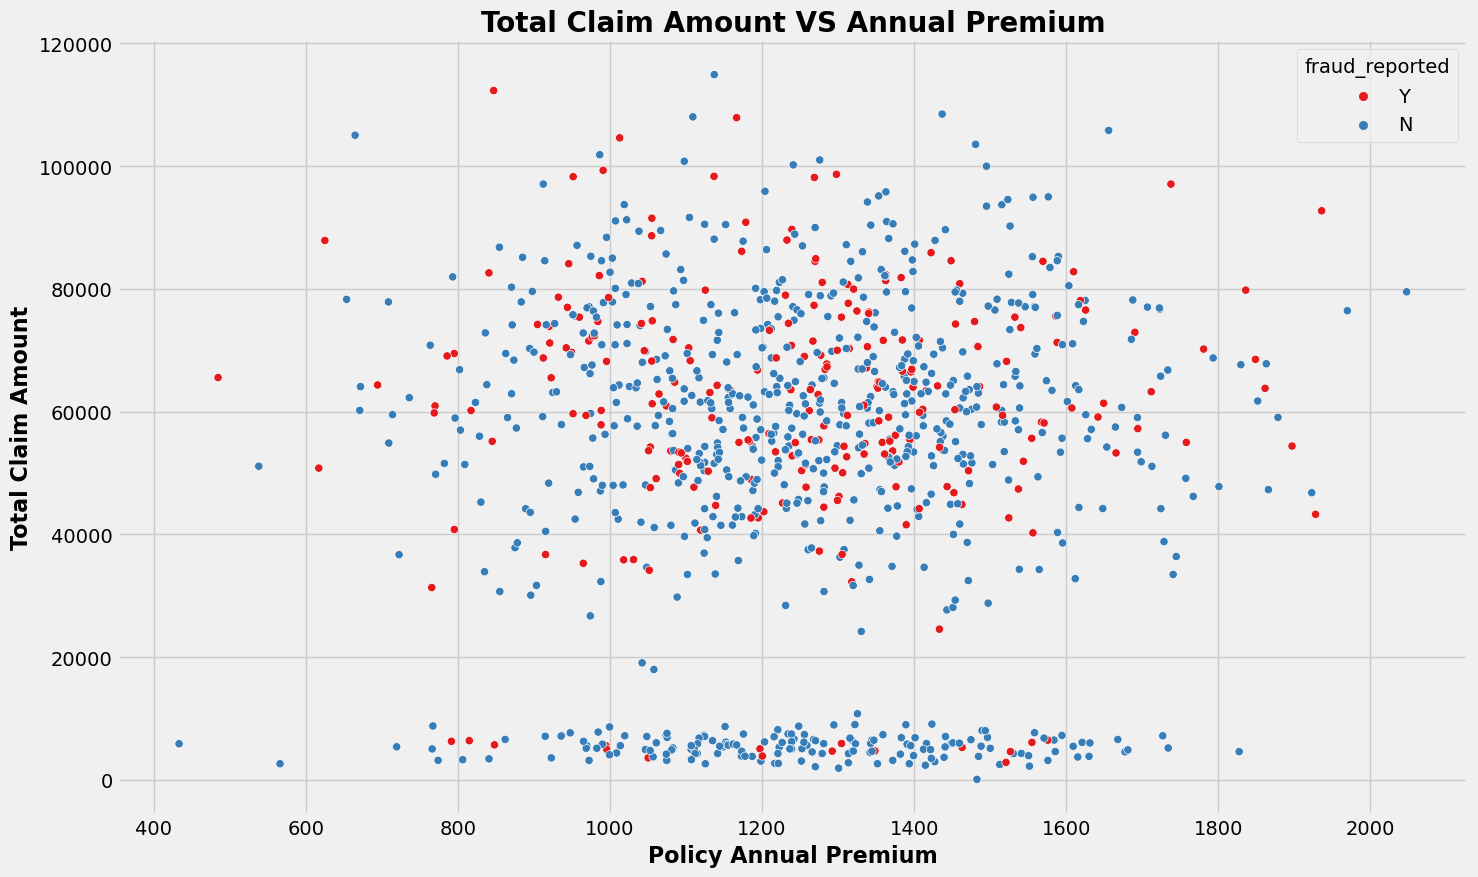

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(x=df['policy_annual_premium'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

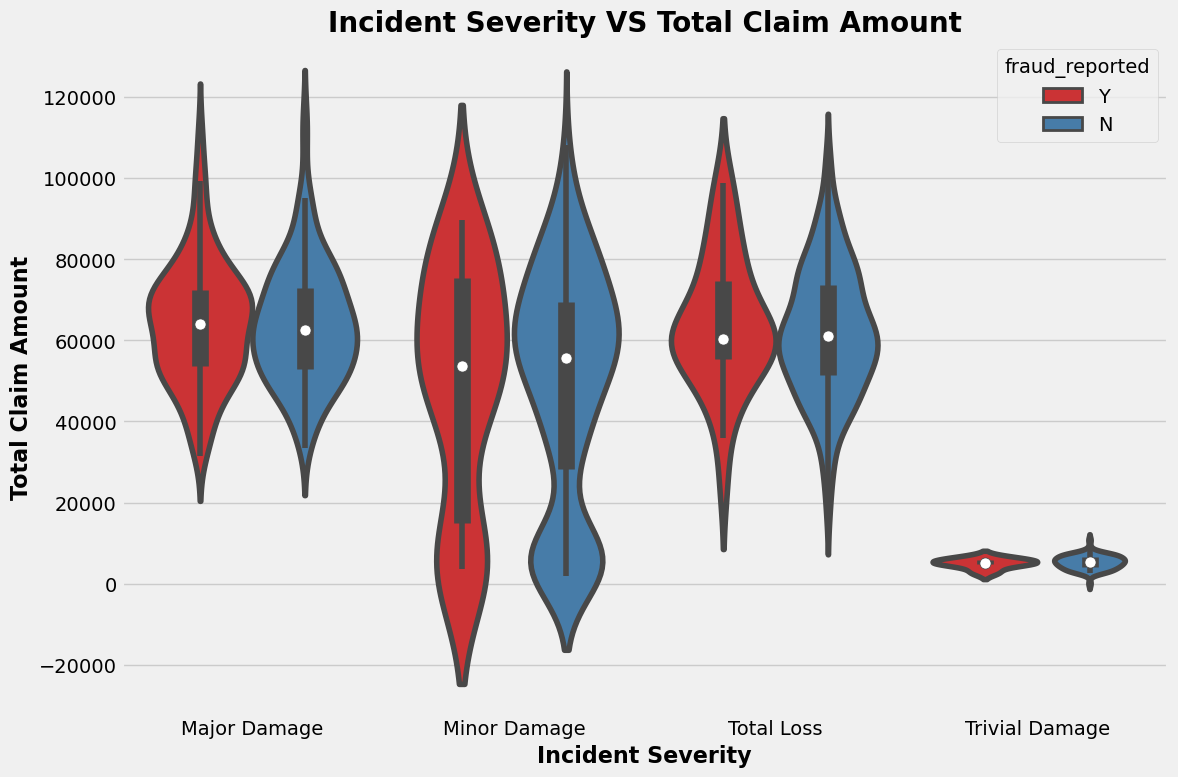

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(x=df['incident_severity'], y=df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [50]:
pd.set_option('display.max_columns', None) 
df.head()

months_as_customer  age policy_state  policy_deductable  \
0                 328   48           OH               1000   
1                 228   42           IN               2000   
2                 134   29           OH               2000   
3                 256   41           IL               2000   
4                 228   44           IL               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                      MD   
1                1197.22         5000000        MALE                      MD   
2                1413.14         5000000      FEMALE                     PhD   
3                1415.74         6000000      FEMALE                     PhD   
4                1583.91         6000000        MALE               Associate   

  insured_occupation insured_hobbies insured_relationship  capital-gains  \
0       craft-repair        sleeping              husband          53300   
1  machine-op-inspct         reading       other-relative              0   
2              sales     board-games            own-child          35100   
3       armed-forces     board-games            unmarried          48900   
4              sales     board-games            unmarried          66000   

   capital-loss             incident_type   collision_type incident_severity  \
0             0  Single Vehicle Collision   Side Collision      Major Damage   
1             0             Vehicle Theft   Rear Collision      Minor Damage   
2             0   Multi-vehicle Collision   Rear Collision      Minor Damage   
3        -62400  Single Vehicle Collision  Front Collision      Major Damage   
4        -46000             Vehicle Theft   Rear Collision      Minor Damage   

  authorities_contacted incident_state incident_city  \
0                Police             SC      Columbus   
1                Police             VA     Riverwood   
2                Police             NY      Columbus   
3                Police             OH     Arlington   
4                   NaN             NY     Arlington   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1              NO   
2                         7                            3              NO   
3                         5                            1              NO   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                      NO                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             650           4550     Accura        RSX   

  fraud_reported CSL_Personal CSL_Accidental  policy_bind_day  \
0              Y          250            500               17   
1              Y          250            500               27   
2              N          100            300                6   
3              Y          250            500               25   
4              N          500           1000                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              2014            25      

# Encoding categorical data

In [51]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

months_as_customer  age  policy_state  policy_deductable  \
0                 328   48             2               1000   
1                 228   42             1               2000   
2                 134   29             2               2000   
3                 256   41             0               2000   
4                 228   44             0               1000   

   policy_annual_premium  umbrella_limit  insured_sex  \
0                1406.91               0            1   
1                1197.22         5000000            1   
2                1413.14         5000000            0   
3                1415.74         6000000            0   
4                1583.91         6000000            1   

   insured_education_level  insured_occupation  insured_hobbies  \
0                        4                   2               17   
1                        4                   6               15   
2                        6                  11                2   
3                        6                   1                2   
4                        0                  11                2   

   insured_relationship  capital-gains  capital-loss  incident_type  \
0                     0          53300             0              2   
1                     2              0             0              3   
2                     3          35100             0              0   
3                     4          48900        -62400              2   
4                     4          66000        -46000              3   

   collision_type  incident_severity  authorities_contacted  incident_state  \
0               2                  0                      3               4   
1               1                  1                      3               5   
2               1                  1                      3               1   
3               0                  0                      3               2   
4               1                  1                      4               1   

   incident_city  incident_hour_of_the_day  number_of_vehicles_involved  \
0              1                         5                            1   
1              5                         8                            1   
2              1                         7                            3   
3              0                         5                            1   
4              0                        20                            1   

   property_damage  bodily_injuries  witnesses  police_report_available  \
0                1                1          2                        1   
1                0                0          0                        0   
2                0                2          3                        0   
3                0                1          2                        0   
4                0                0          1                        0   

   total_claim_amount  injury_claim  property_claim  vehicle_claim  auto_make  \
0               71610          6510           13020          52080         10   
1                5070           780             780           3510          8   
2               34650          7700            3850          23100          4   
3               63400          6340            6340          50720          3   
4                6500          1300             650           4550          0   

   auto_model  fraud_reported  CSL_Personal  CSL_Accidental  policy_bind_day  \
0           1               1             1               2               17   
1          12               1             1               2               27   
2          30               0             0               1                6   
3          34               1             1               2               25   
4          31               0             2               0                6   

   policy_bind_month  policy_bind_year  incident_day  incident_month  \
0                 10              

## Feature selection and Engineering

## 1. Outliers Detection and Removal

In [53]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [54]:
len(Numerical)


21

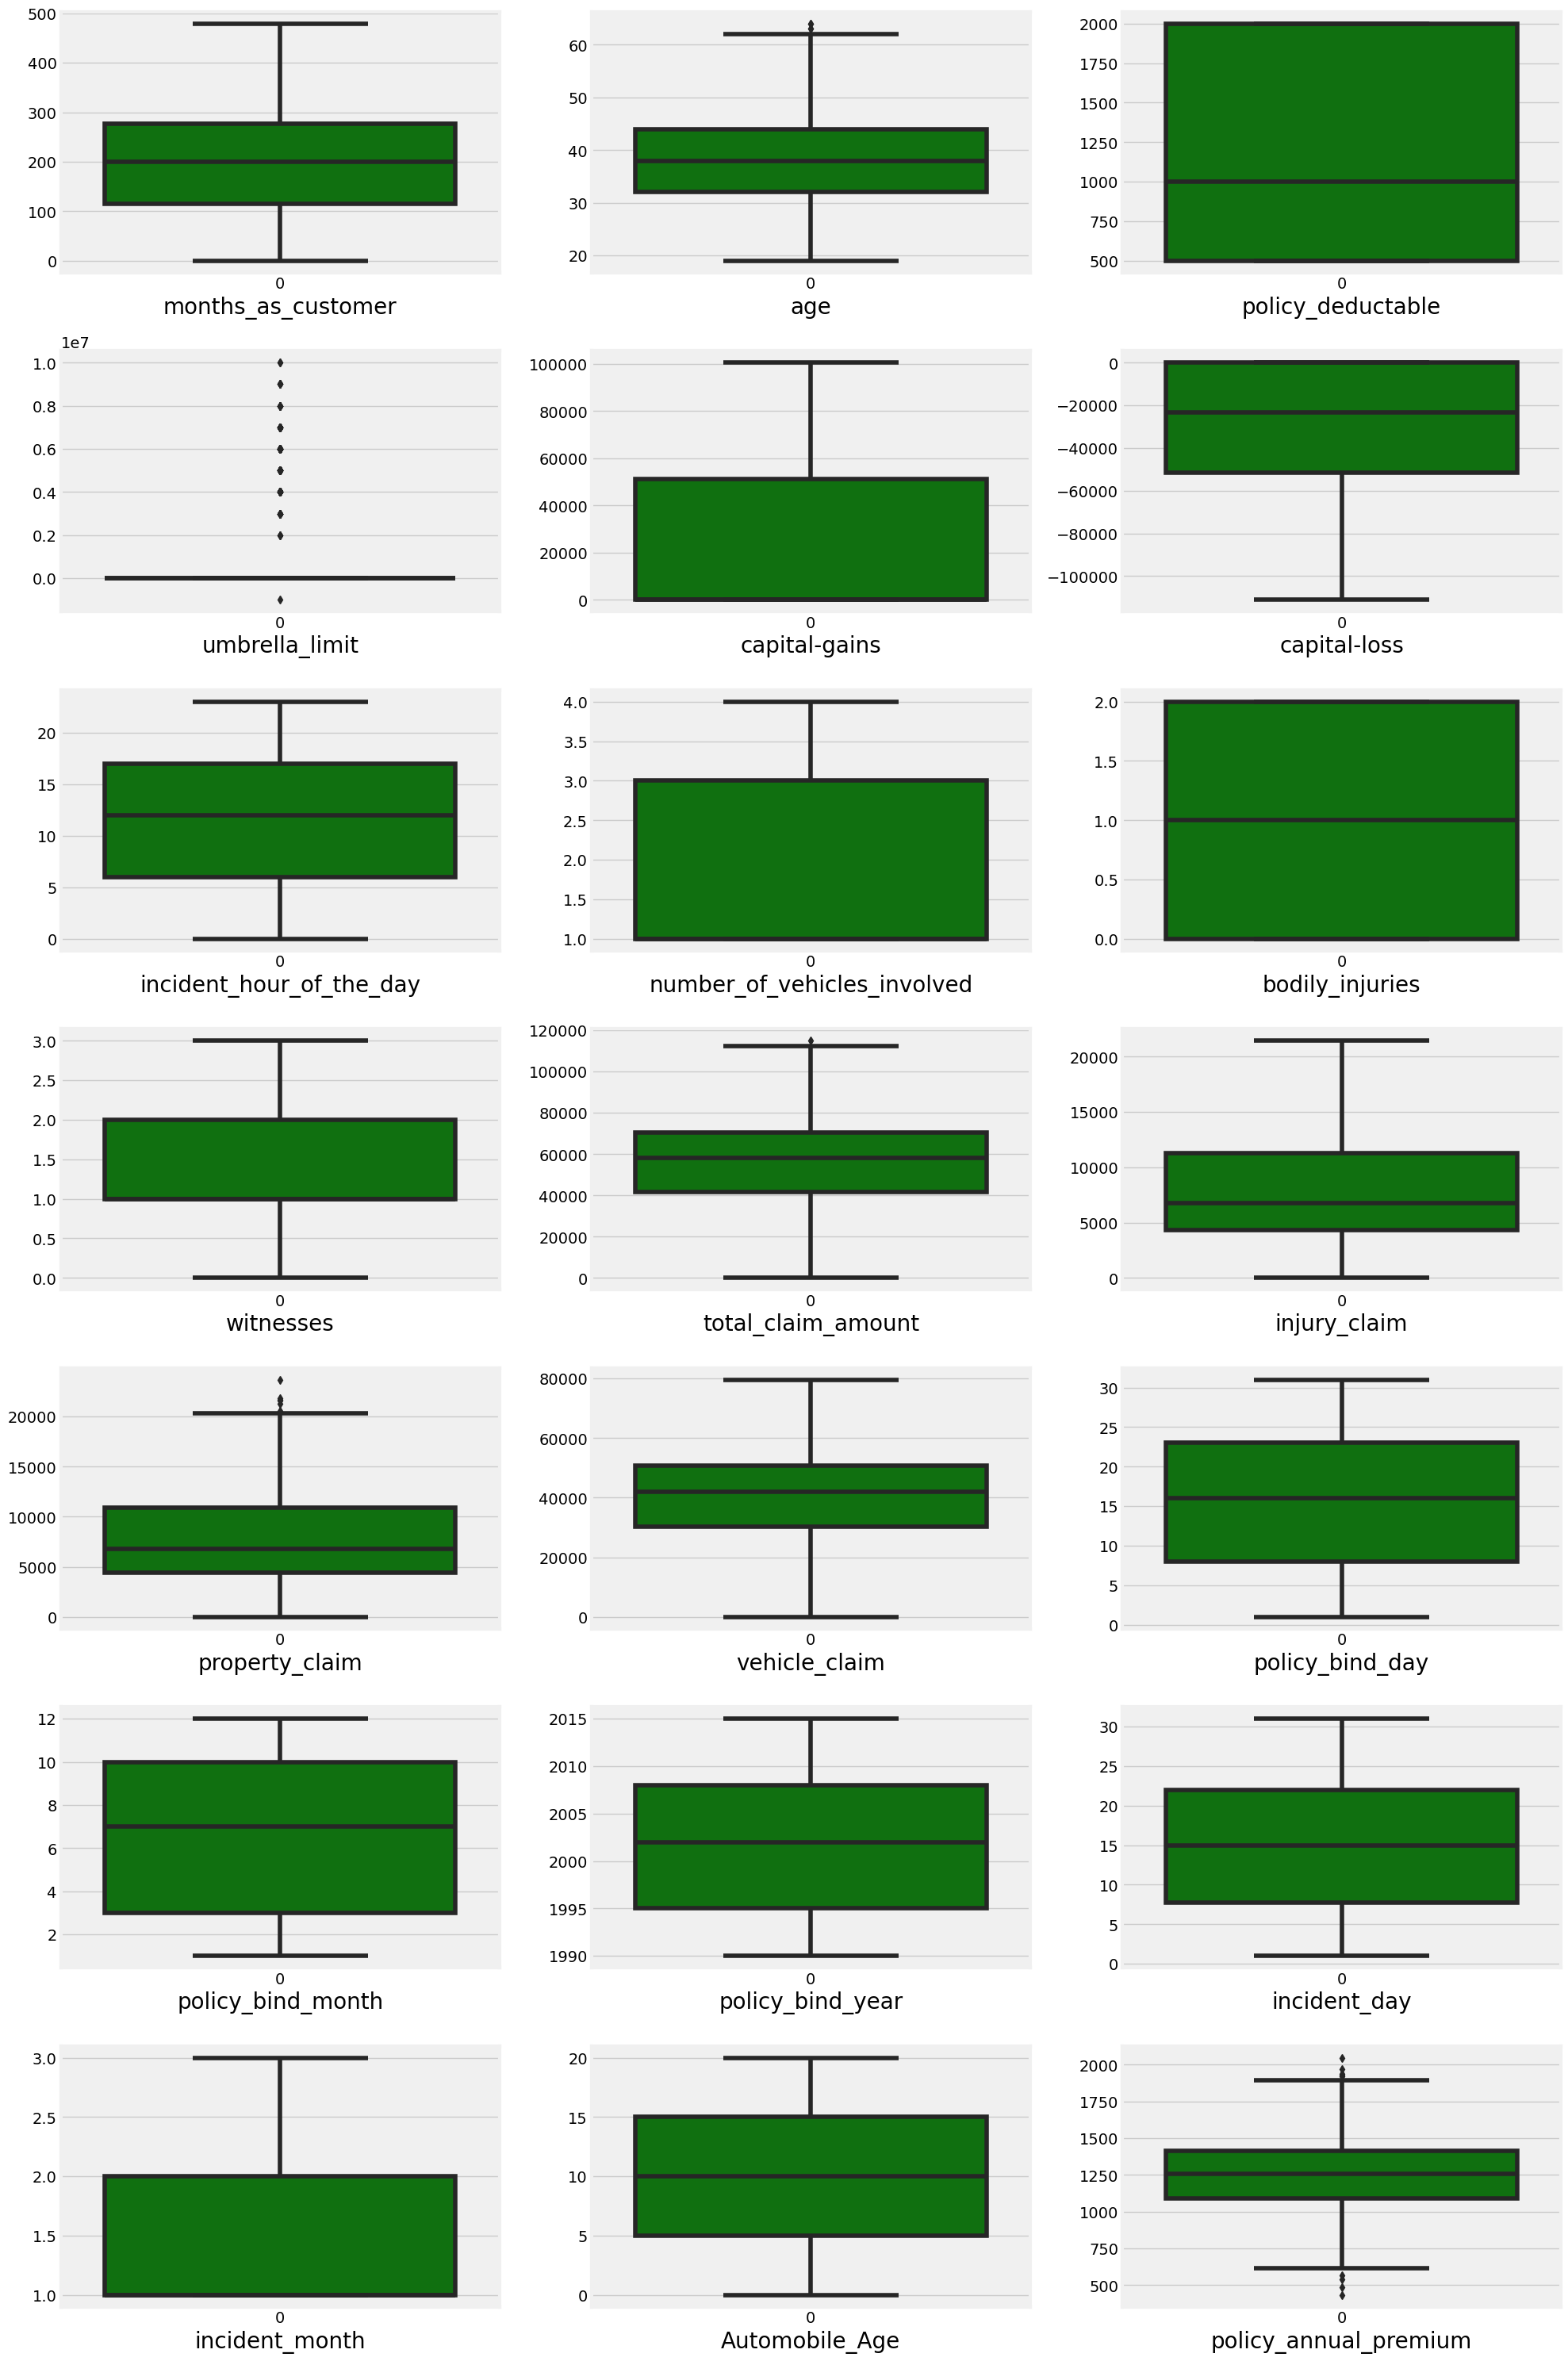

In [55]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

##### From Boxplot we can see outliers exist dataset.

## Outliers removal using Zscore method

In [56]:
numeric_columns = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age']

In [57]:
from scipy.stats import zscore
z = df[numeric_columns].apply(zscore)
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy()

Shape of the dataframe before removing outliers:  (1000, 41)
Shape of the dataframe after removing outliers:  (983, 41)
Percentage of data loss post outlier removal:  1.7000000000000002


In [58]:
print(df.columns)



Index(['months_as_customer', 'age', 'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'fraud_reported', 'CSL_Personal', 'CSL_Accidental', 'policy_bind_day',
       'policy_bind_month', 'policy_bind_year', 'incident_day',
       'incident_month', 'Automobile_Age', 'age_bins'],
      dtype='object')


# 2. Skewness of features

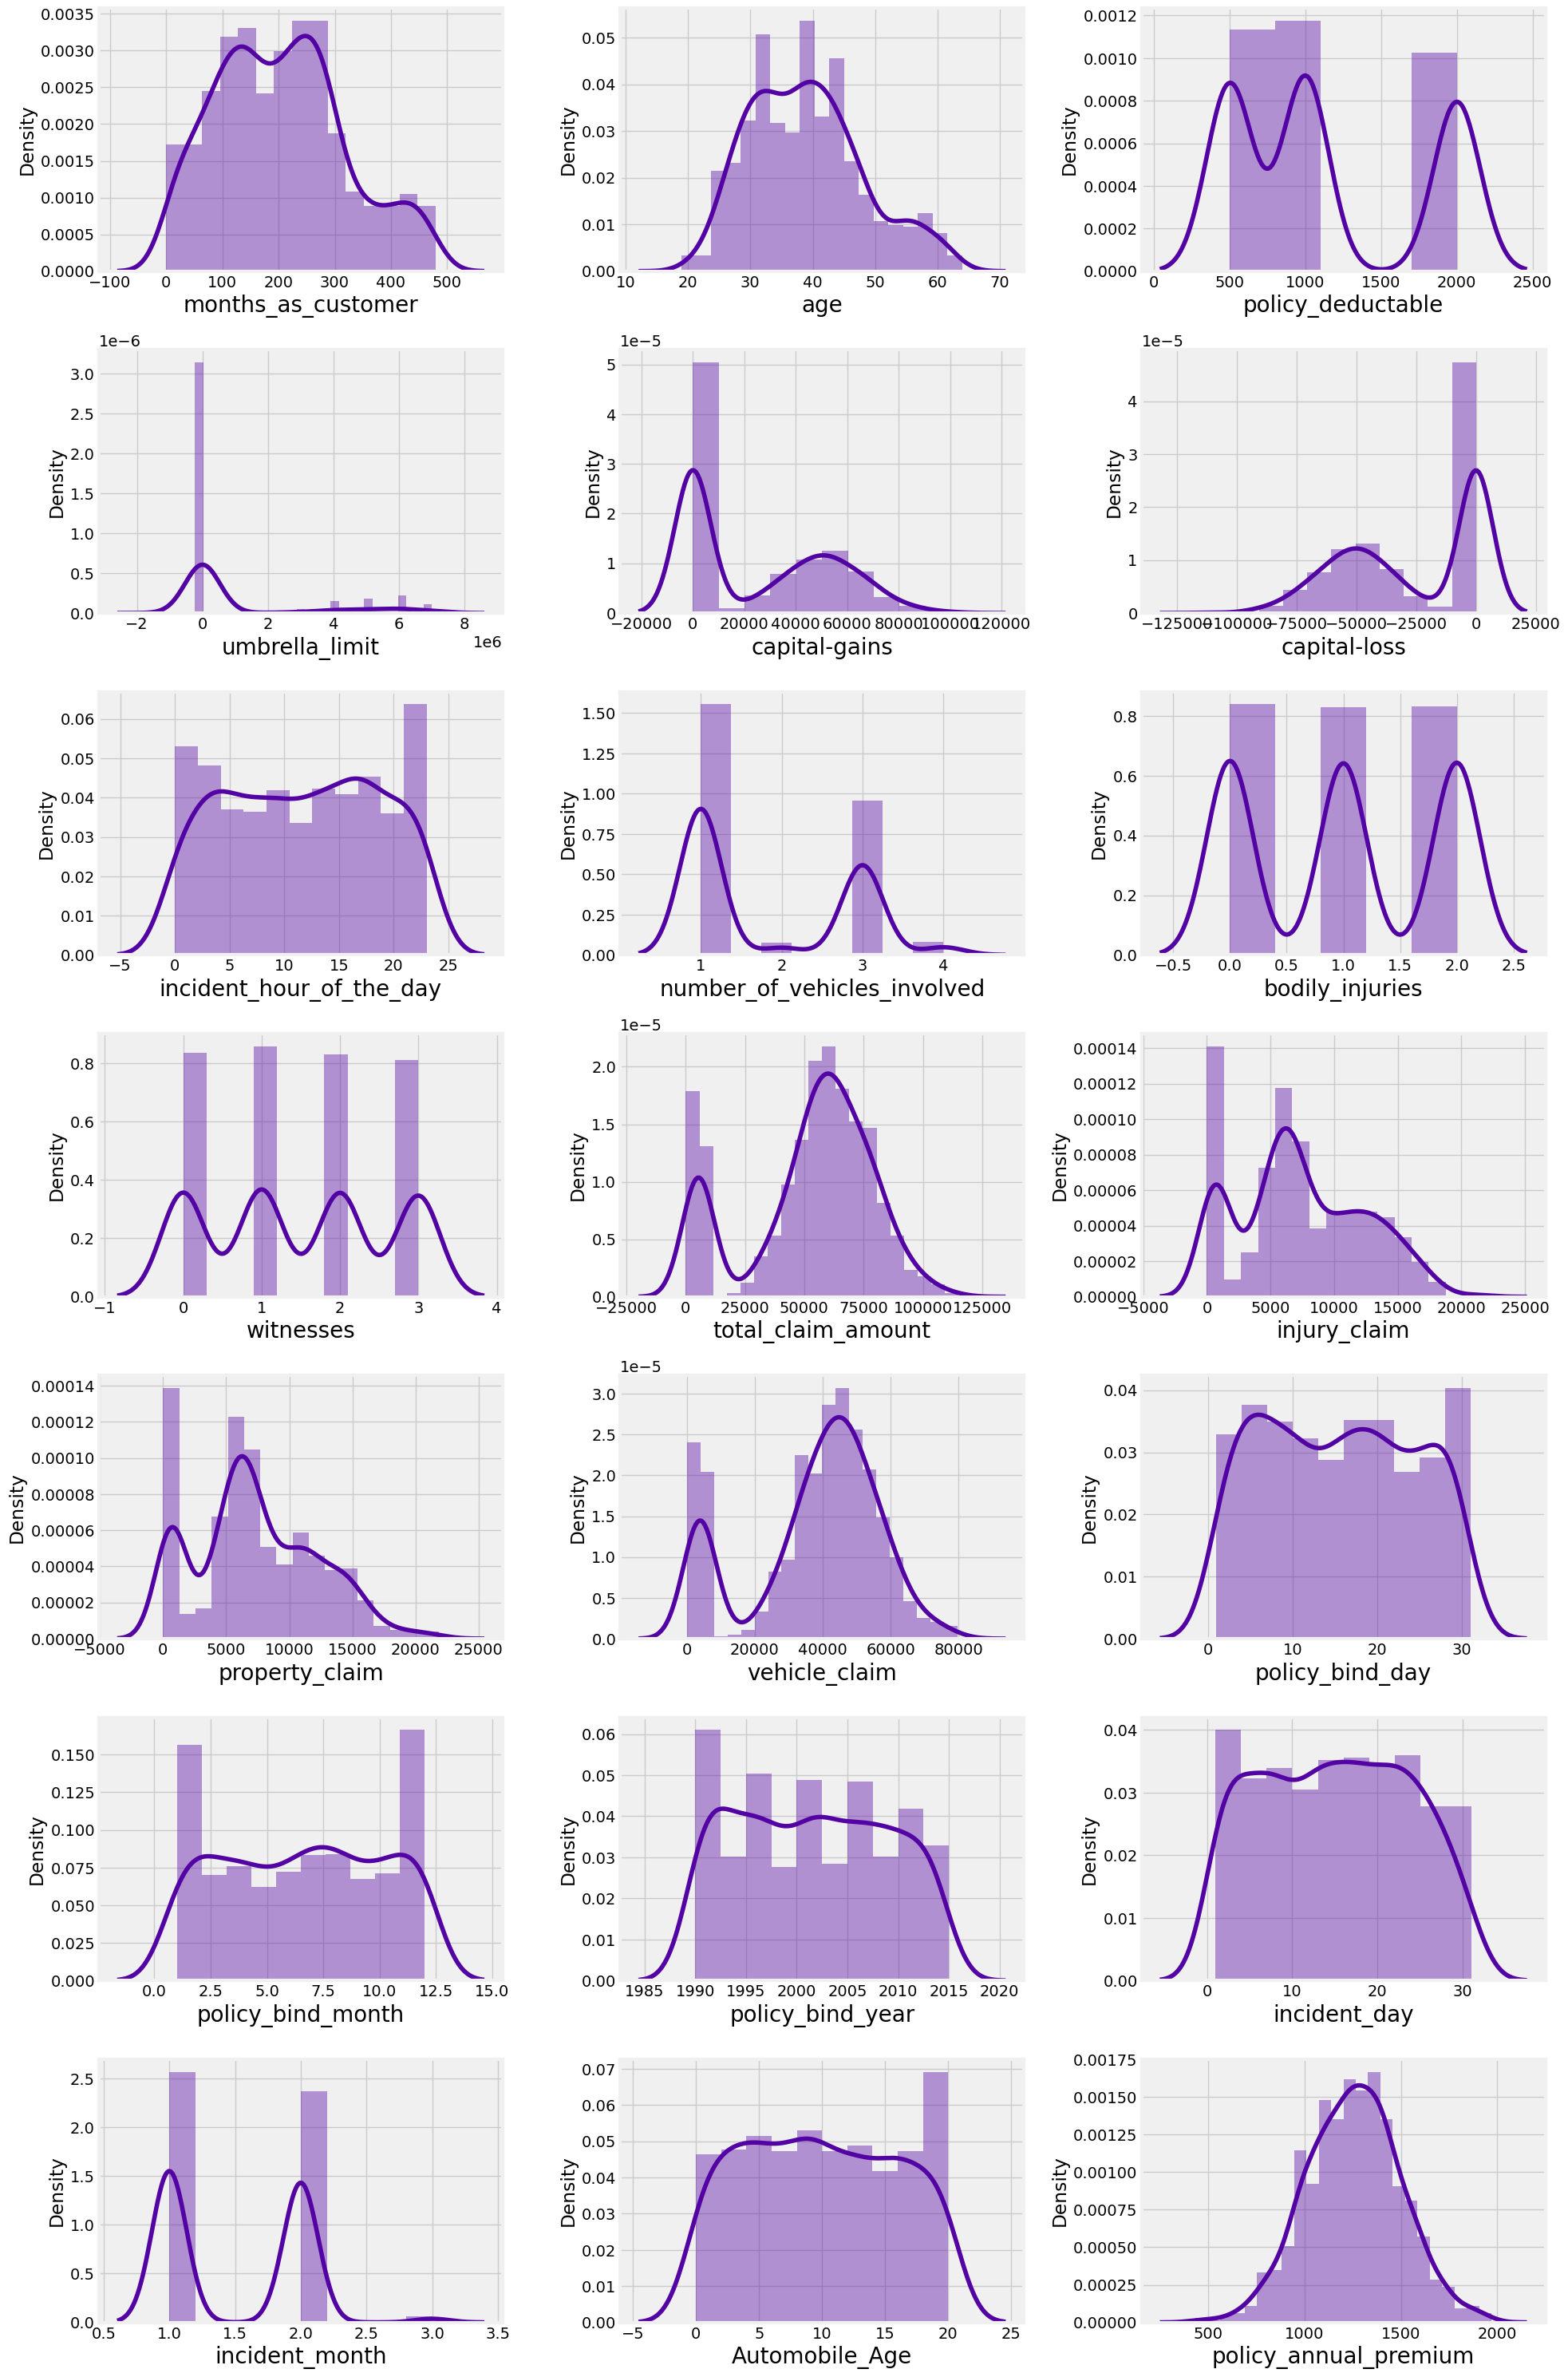

In [59]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

### Skewness is important feature for continous data. There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.

####     .We also going to ignore sknewness in target feature.

In [60]:
df[Numerical].skew()

months_as_customer             0.366303
age                            0.478261
policy_deductable              0.475798
umbrella_limit                 1.806345
capital-gains                  0.466842
capital-loss                  -0.389587
incident_hour_of_the_day      -0.034787
number_of_vehicles_involved    0.505944
bodily_injuries                0.005622
witnesses                      0.021612
total_claim_amount            -0.594422
injury_claim                   0.268453
property_claim                 0.357089
vehicle_claim                 -0.621070
policy_bind_day                0.052180
policy_bind_month             -0.027118
policy_bind_year               0.060568
incident_day                   0.037809
incident_month                 0.261251
Automobile_Age                 0.056044
policy_annual_premium         -0.017987
dtype: float64

#### . Out above features 'umbrella_limit','total_claim_amount' and 'vehicle_claim' are continous variable with skew data. The variable 'incident_month' is skewed but it is discrete in nature.So ignore it.

 . We will use yeo-johnson method to transform negatively skewed data.

In [61]:
skew=['total_claim_amount','vehicle_claim']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

df[skew] = scaler.fit_transform(df[skew].values)

## Checking Skewness after transformation

In [62]:
df[skew].skew()

total_claim_amount   -0.509855
vehicle_claim        -0.522650
dtype: float64

### For 'total_claim_amount','vehicle_claim' skewness has not been removed but it got reduced

## 3. Corrleation

In [63]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns


In [64]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

df_numeric = df.drop(columns=non_numeric_columns)

correlation_matrix = df_numeric.corr()
print("Correlation matrix:\n", correlation_matrix)


Non-numeric columns: Index(['age_bins'], dtype='object')
Correlation matrix:
                              months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.923043     -0.006014   
age                                    0.923043  1.000000     -0.018313   
policy_state                          -0.006014 -0.018313      1.000000   
policy_deductable                      0.032205  0.033125      0.017842   
policy_annual_premium                  0.003122  0.012847      0.019202   
umbrella_limit                         0.019260  0.014368     -0.010301   
insured_sex                            0.059799  0.073185     -0.019257   
insured_education_level               -0.000461  0.001252     -0.028406   
insured_occupation                     0.008934  0.016517     -0.025073   
insured_hobbies                       -0.089730 -0.079313     -0.039297   
insured_relationship                   0.069490  0.074604     -0.016766   
capital-gains         

In [65]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_state                   0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model

In [66]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')

df_numeric = df_numeric.dropna()

correlation_matrix = np.corrcoef(df_numeric.values, rowvar=False)

correlation_coef_1_2 = correlation_matrix[0, 1]

print("Correlation coefficient between first and second columns:", correlation_coef_1_2)

print("Correlation Matrix:")
print(correlation_matrix)


Correlation coefficient between first and second columns: nan
Correlation Matrix:
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [67]:
string = "41-50"
string = string.replace("-", "")
float_value = float(string)

In [68]:
import re

string = "41-50"
match = re.search(r"\d+", string)
float_value = float(match.group())

In [69]:
try:
    float_value = float("41-50")
except ValueError:
    print("Could not convert string to float")

Could not convert string to float


In [70]:
try:
    range_str = "41-50"
    start, end = map(int, range_str.split('-'))
    float_value = (start + end) / 2
    print("Converted value:", float_value)
except ValueError:
    print("Could not convert string to float")


Converted value: 45.5


In [71]:
df['age_bins'] = df['age_bins'].replace({'41-50': 45.5})

df = df.apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)

correlation_matrix = df.corr()


In [72]:
df.corr()

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.600400      0.025295   
age                                    0.600400  1.000000      0.009515   
policy_state                           0.025295  0.009515      1.000000   
policy_deductable                     -0.010233 -0.008315      0.068151   
policy_annual_premium                  0.042499  0.048193      0.033353   
umbrella_limit                         0.100597 -0.019717     -0.054160   
insured_sex                            0.011079  0.030407     -0.076666   
insured_education_level                0.096532  0.127306     -0.047861   
insured_occupation                     0.058469 -0.017066     -0.041606   
insured_hobbies                       -0.070246 -0.051719     -0.054580   
insured_relationship                   0.071217 -0.003558     -0.000479   
capital-gains                          0.033982 -0.060973      0.053241   
capital-loss                           0.098570  0.080759      0.029346   
incident_type                         -0.007851 -0.042007      0.041134   
collision_type                         0.049557  0.004674      0.096841   
incident_severity                      0.011686 -0.010242     -0.068945   
authorities_contacted                 -0.006661  0.021521     -0.000885   
incident_state                         0.043297 -0.007747     -0.019085   
incident_city                          0.011799 -0.062803      0.049793   
incident_hour_of_the_day              -0.051793 -0.006046      0.051304   
number_of_vehicles_involved            0.022619  0.046800     -0.099614   
property_damage                        0.134077  0.108285     -0.020931   
bodily_injuries                       -0.016647 -0.045631      0.010183   
witnesses                              0.023041  0.068814      0.101066   
police_report_available                0.022300  0.062155      0.107382   
total_claim_amount                    -0.095061 -0.088889      0.019033   
injury_claim                          -0.051641 -0.030298     -0.053642   
property_claim                        -0.172181 -0.107109     -0.012162   
vehicle_claim                         -0.073510 -0.088922      0.046323   
auto_make                              0.046624  0.047950      0.003043   
auto_model                            -0.085822 -0.010918     -0.028292   
fraud_reported                        -0.044726 -0.102211      0.092111   
CSL_Personal                           0.059102  0.088237     -0.077296   
CSL_Accidental                        -0.079203 -0.067608      0.035529   
policy_bind_day                        0.050428 -0.020589      0.053865   
policy_bind_month                     -0.116651 -0.062449     -0.020440   
policy_bind_year                       0.002924  0.019699     -0.045014   
incident_day                          -0.000096  0.038486      0.040978   
incident_month                        -0.011010 -0.019766      0.012211   
Automobile_Age                        -0.041067  0.064731      0.014762   
age_bins                                    NaN       NaN           NaN   

                             policy_deductable  policy_annual_premium  \
months_as_customer                   -0.010233               0.042499   
age                                  -0.008315               0.048193   
policy_state                          0.068151               0.033353   
policy_deductable                     1.000000              -0.013260   
policy_annual_premium                -0.013260               1.000000   
umbrella_limit                        0.088250               0.005698   
insured_sex                          -0.017500               0.063539   
insured_education_level              -0.002834              -0.033753   
insured_occupation                   -0.084532              -0.056611   
insured_hobbies                      -0.071349              -0.041722   
insured_relationship                 -0.017974              -0.010707   
ca

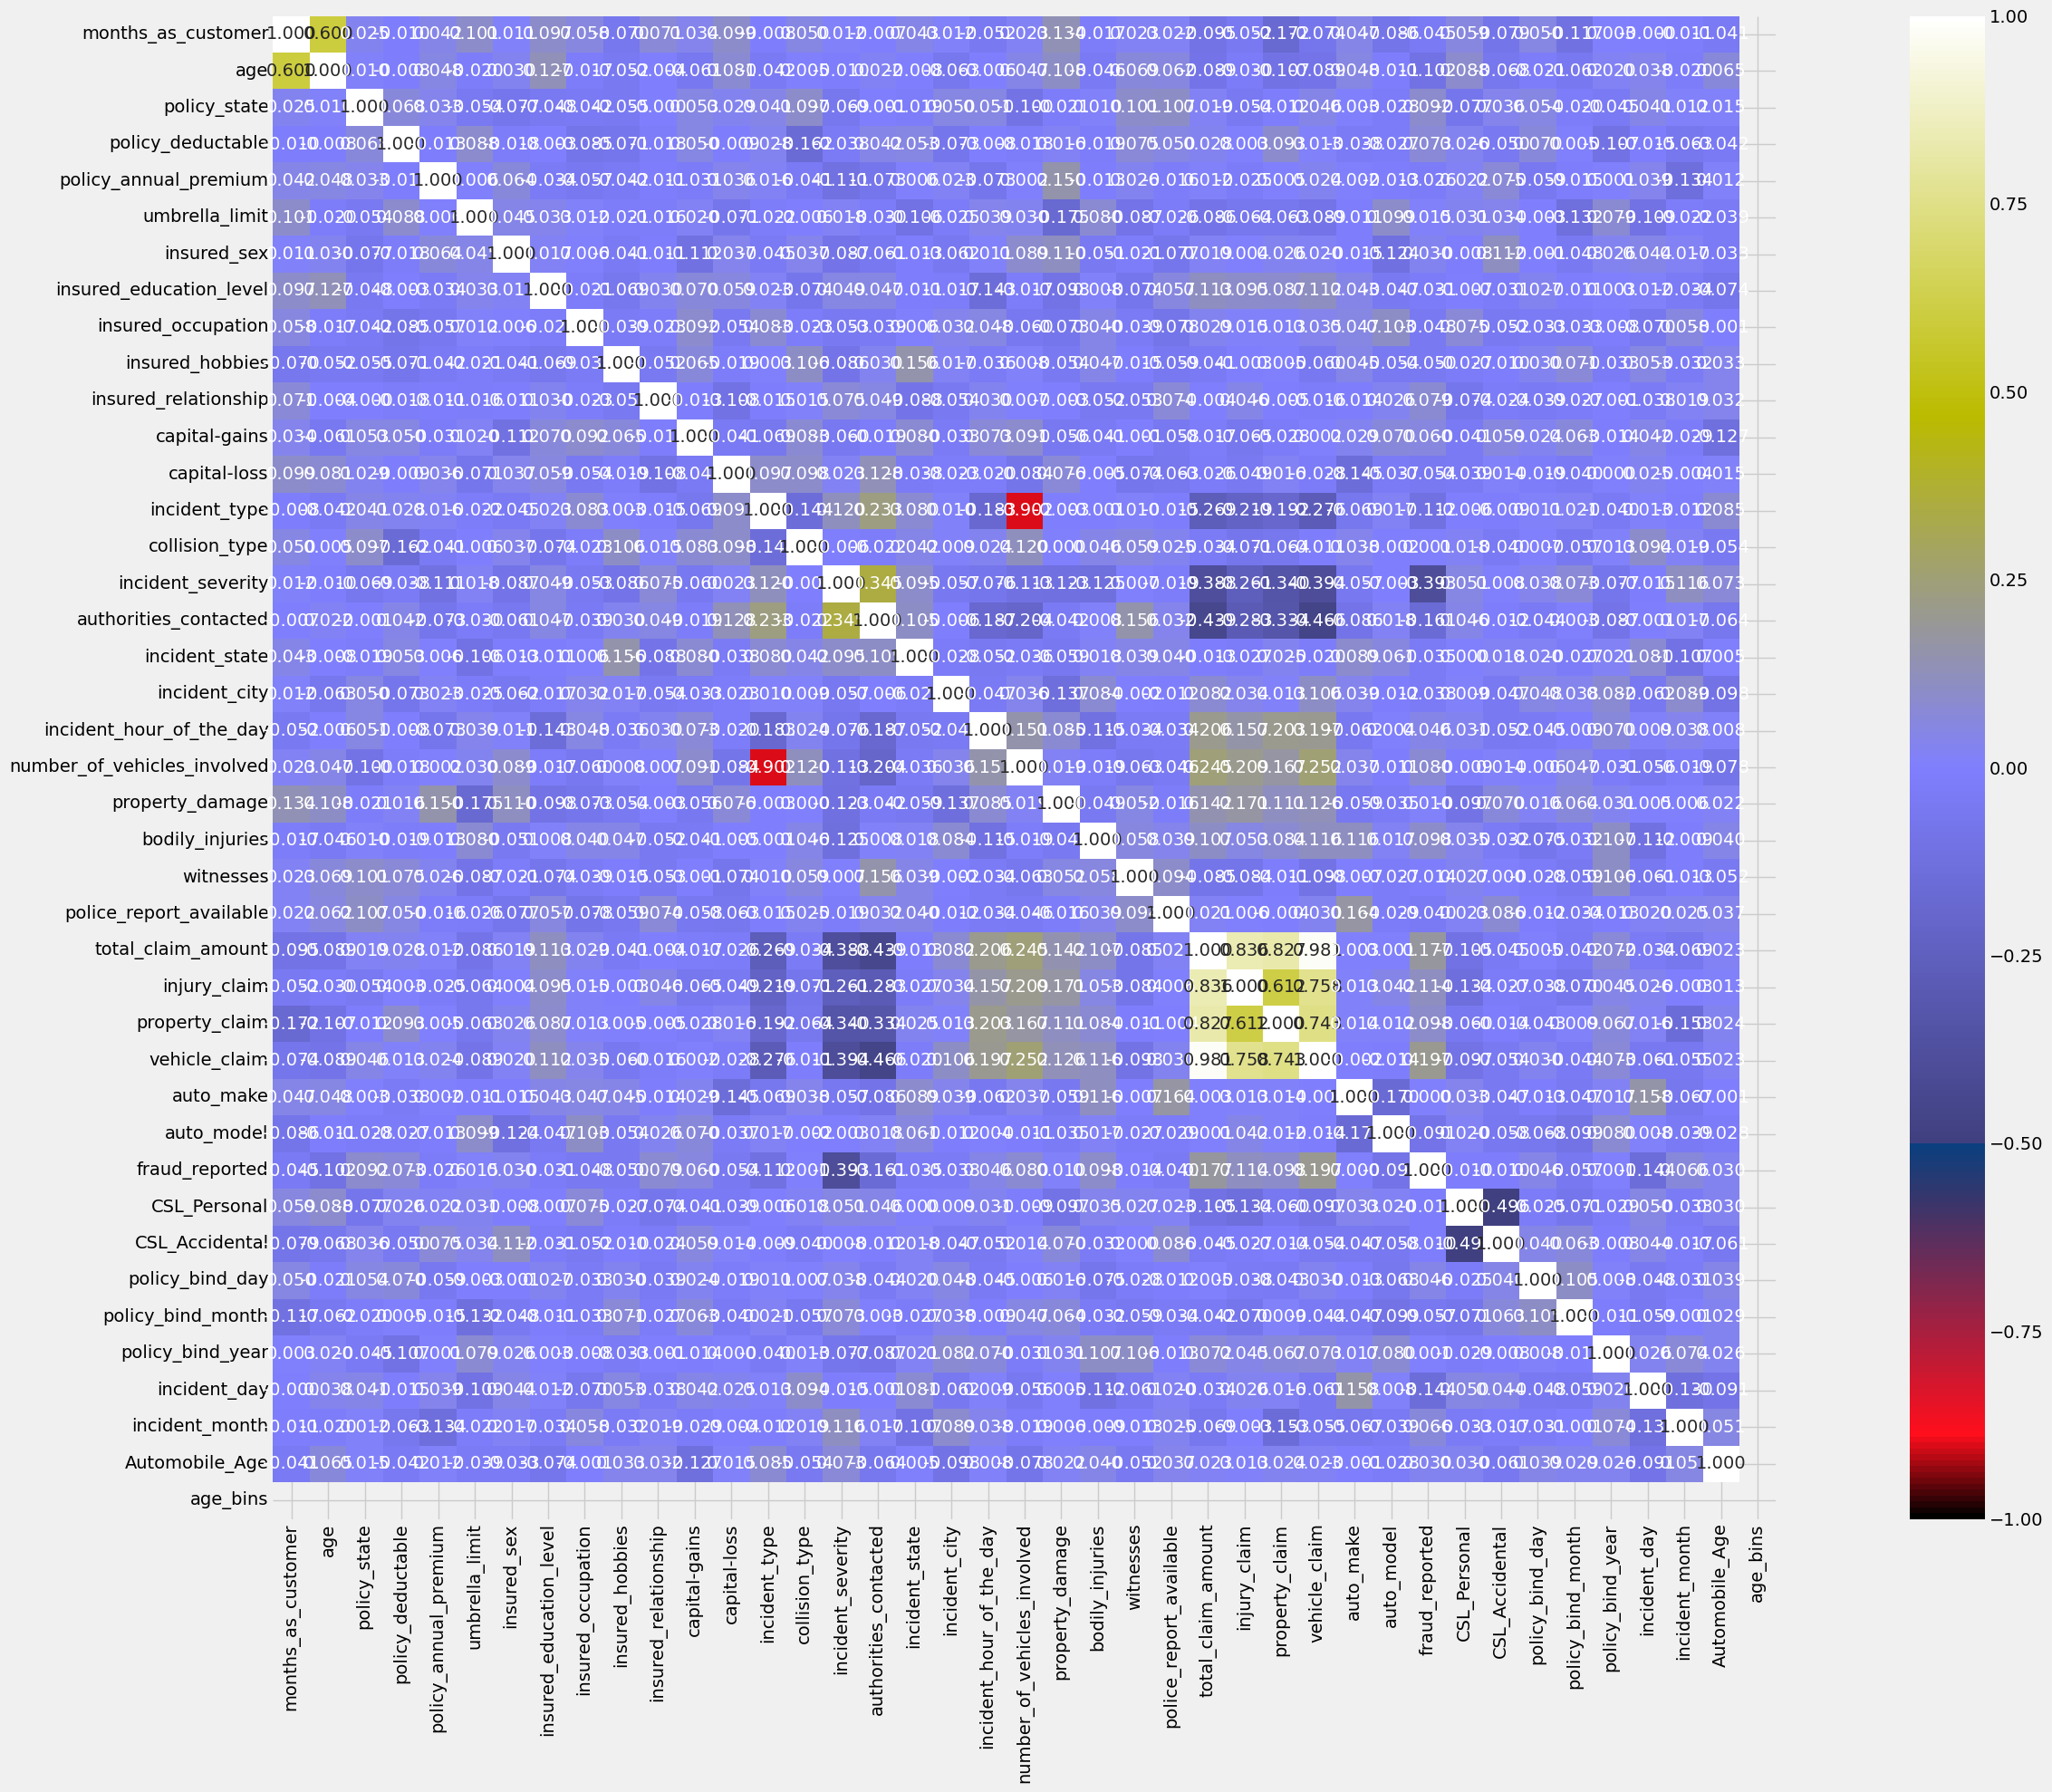

In [73]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

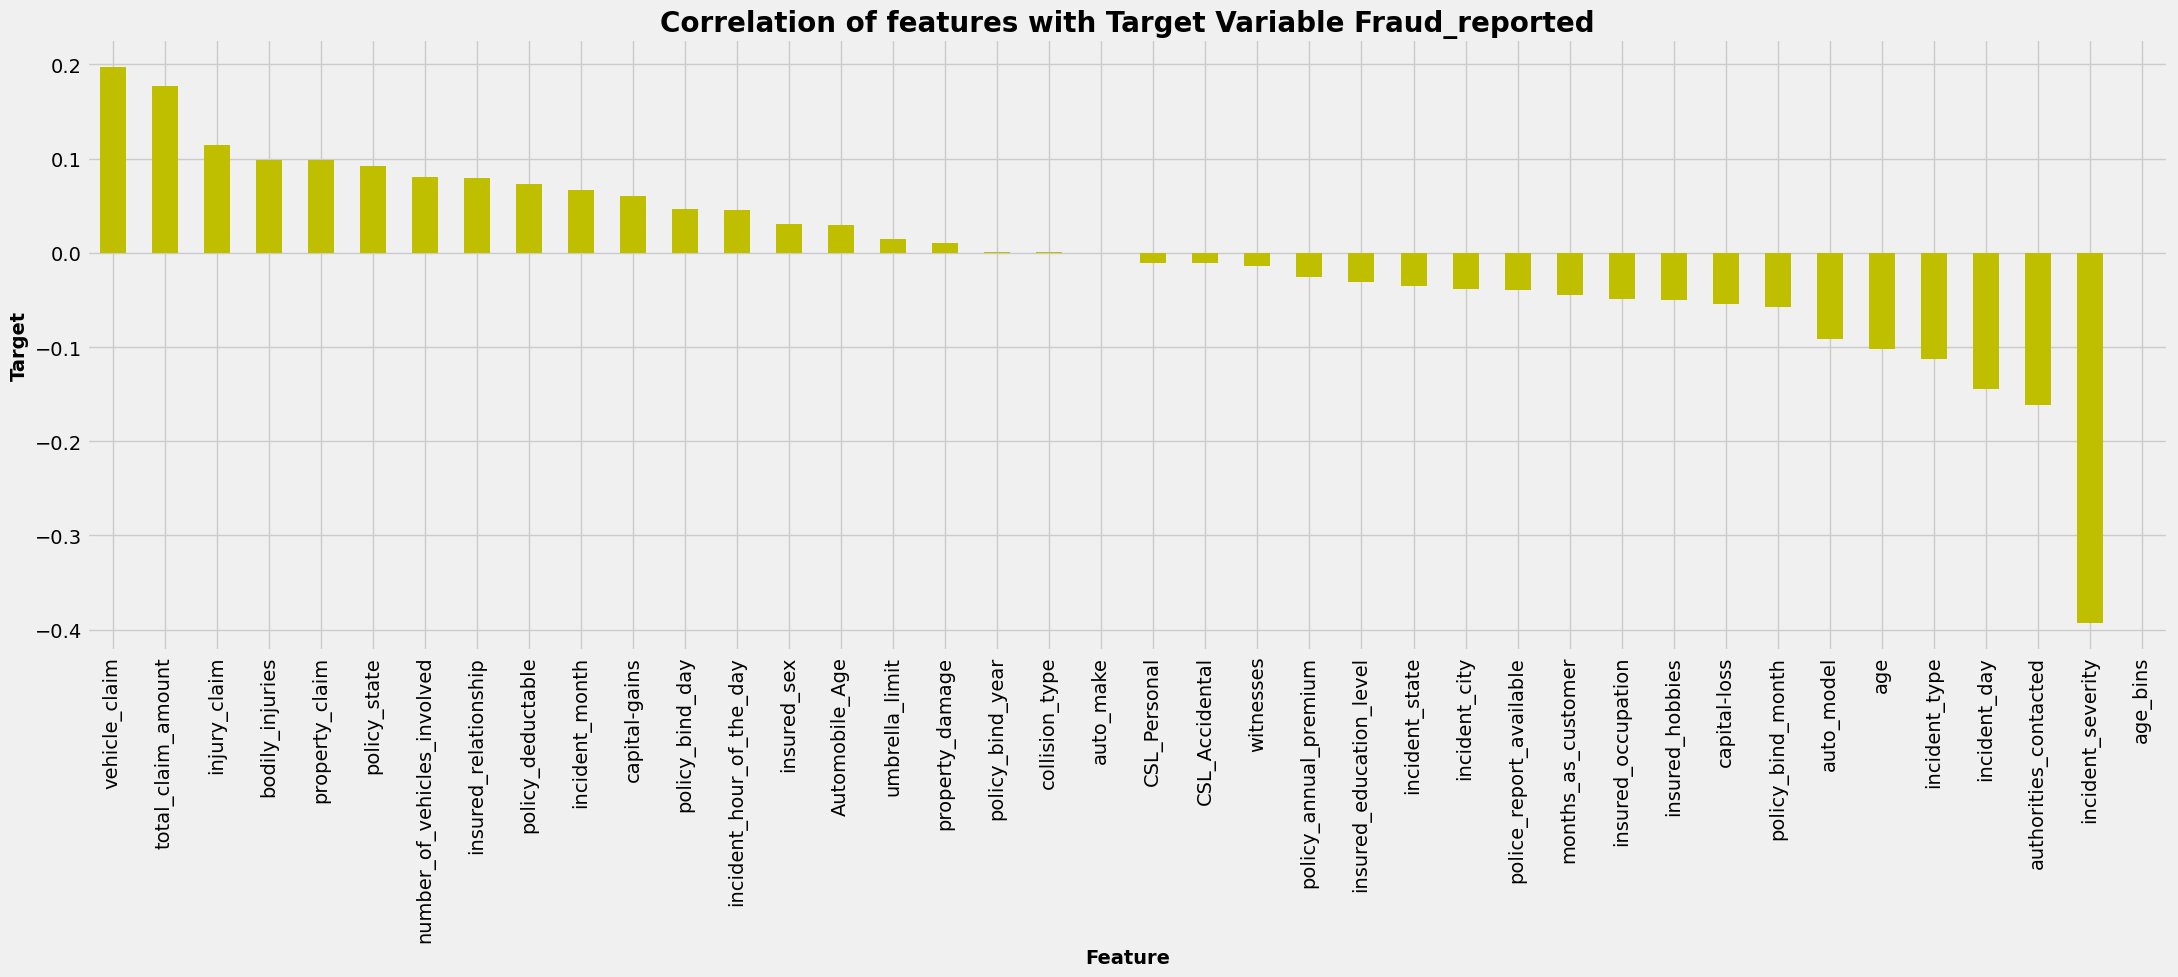

In [74]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

## Observation:
    
    
 . incident_severity is correlated with target variable with correlation of 0.4. Other variable are poorly correlated with target variable.

 . Other variable are poorly correlated with target variable.
    
 . injury_claim,property_claim,vehicle_claim are highly correlated with each other.

 . incident_hour_of_the_day is highly negative correlated with incident type.

## 4. Balancing Imbalanced target feature

In [75]:
df.fraud_reported.value_counts()

fraud_reported
0    219
1     70
Name: count, dtype: int64

### As Target variable data is Imbalanced in nature we will need to balance target variable.

#### Balancing using SMOTE

In [76]:
from imblearn.over_sampling import SMOTE

In [77]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [78]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [79]:
Y.value_counts()

fraud_reported
1    219
0    219
Name: count, dtype: int64

#### We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

## Standard Scaling

In [80]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### 5. Checking Multicollinearity between features using variance_inflation_factor

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values                     Features
0       2.025025           months_as_customer
1       1.937808                          age
2       1.124395                 policy_state
3       1.226822            policy_deductable
4       1.150717        policy_annual_premium
5       1.349886               umbrella_limit
6       1.168374                  insured_sex
7       1.265308      insured_education_level
8       1.172545           insured_occupation
9       1.262112              insured_hobbies
10      1.196551         insured_relationship
11      1.322081                capital-gains
12      1.319452                 capital-loss
13      4.181914                incident_type
14      1.225805               collision_type
15      1.648513            incident_severity
16      1.757725        authorities_contacted
17      1.302787               incident_state
18      1.233926                incident_city
19      1.248117     incident_hour_of_the_day
20      4.036936  number_of_vehicles_involved
21      1.257847              property_damage
22      1.151082              bodily_injuries
23      1.357656                    witnesses
24      1.161613      police_report_available
25  45570.483518           total_claim_amount
26   1861.680551                 injury_claim
27   1970.990270               property_claim
28  21565.000974                vehicle_claim
29      1.230107                    auto_make
30      1.209163                   auto_model
31      1.443088                 CSL_Personal
32      1.387589               CSL_Accidental
33      1.144117              policy_bind_day
34      1.199653            policy_bind_month
35      1.183931             policy_bind_year
36      1.230122                 incident_day
37      1.210775               incident_month
38      1.186789               Automobile_Age
39           NaN                     age_bins

#### Strategy to Address Multicollinearity :
 1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
    
 2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

We will go by Second way for further investigation. As For some Independent feature VIF is exceed permissible limit of 10.

## PCA

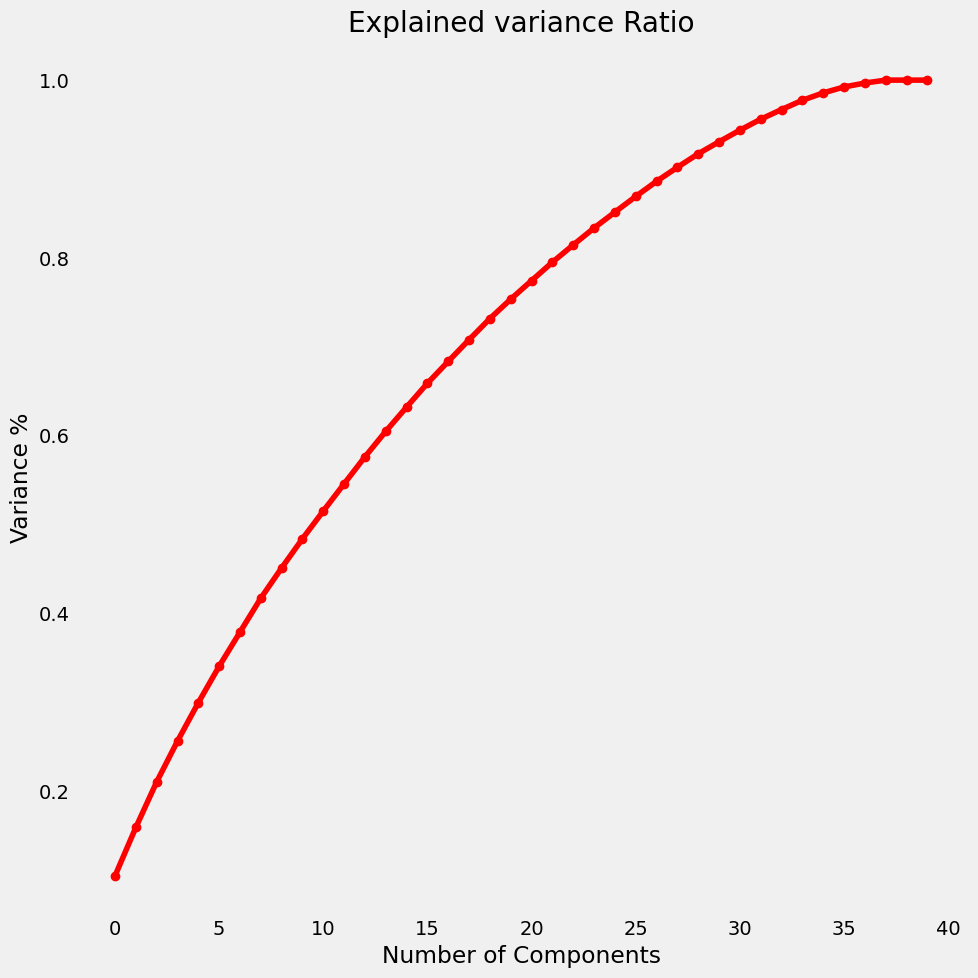

In [82]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

### Comment -
AS per the graph, we can see that 28 principal components attribute for 90% of variation in the data. We shall pick the first 28 components for our prediction.

In [83]:
pca_new = PCA(n_components=28)
x_new = pca_new.fit_transform(X_scale)

In [84]:
principle_x=pd.DataFrame(x_new,columns=np.arange(28))

# Machine Learning Model Building

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (306, 28)
Training target vector size: (306,)
Test feature matrix size: (132, 28)
Test target vector size: (132,)


## Finding best Random state

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8484848484848485 on Random_state 228


In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=9, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.75


Confusion matrix of Logistics Regression : 
 [[48 26]
 [ 7 51]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74        74
           1       0.66      0.88      0.76        58

    accuracy                           0.75       132
   macro avg       0.77      0.76      0.75       132
weighted avg       0.78      0.75      0.75       132



In [89]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.5149286505444373
RMSE value for k=  2 is: 0.4846116845975599
RMSE value for k=  3 is: 0.5707517636920413
RMSE value for k=  4 is: 0.5222329678670935
RMSE value for k=  5 is: 0.5773502691896257
RMSE value for k=  6 is: 0.5222329678670935
RMSE value for k=  7 is: 0.5838742081211422
RMSE value for k=  8 is: 0.5707517636920413
RMSE value for k=  9 is: 0.6030226891555273
RMSE value for k=  10 is: 0.5903260526902472
RMSE value for k=  11 is: 0.6092717958449424
RMSE value for k=  12 is: 0.5903260526902472
RMSE value for k=  13 is: 0.6030226891555273
RMSE value for k=  14 is: 0.5838742081211422
RMSE value for k=  15 is: 0.6154574548966637
RMSE value for k=  16 is: 0.5967081414398551
RMSE value for k=  17 is: 0.6030226891555273
RMSE value for k=  18 is: 0.6154574548966637
RMSE value for k=  19 is: 0.6336522323129238
RMSE value for k=  20 is: 0.6092717958449424


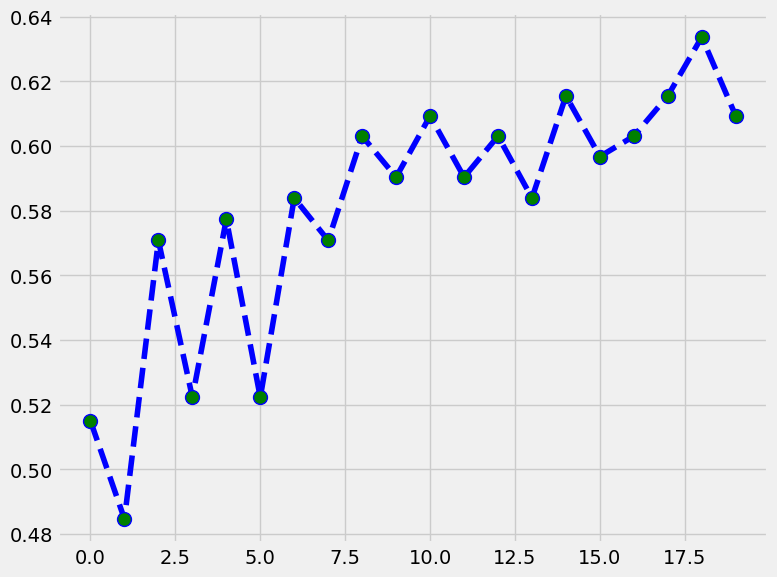

In [90]:
plt.figure(figsize = (8,6))
plt.plot(range(20), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

### Comment-
At k=2, we get the minimum RMSE value which approximately 0.4745789978762495, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

## Applying other classification algorithm

In [91]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.75


Confusion matrix : 
 [[48 26]
 [ 7 51]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74        74
           1       0.66      0.88      0.76        58

    accuracy                           0.75       132
   macro avg       0.77      0.76      0.75       132
weighted avg       0.78      0.75      0.75       132



Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8409090909090909


Confusion matrix : 
 [[60 14]
 [ 7 51]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85        74
           1       0.78      0.88      0.83        58

    accuracy                           0.84       132
   macro avg       0.84      0.85      0.84       132
weighted avg       0.85      0.84      0.84       132



Classificatio

### CrossValidation :

In [92]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, principle_x, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.57954545 0.76136364 0.85227273 0.82758621 0.91954023]
Mean Score : 0.7880616509926854
Std deviation : 0.11589966152664122




Cross Validation Score SVC() :

Score : [0.67045455 0.84090909 0.94318182 0.85057471 0.95402299]
Mean Score : 0.851828631138976
Std deviation : 0.10179043087518584




Cross Validation Score GaussianNB() :

Score : [0.64772727 0.73863636 0.89772727 0.90804598 0.91954023]
Mean Score : 0.8223354231974922
Std deviation : 0.1095194441511087




Cross Validation Score DecisionTreeClassifier() :

Score : [0.625      0.625      0.81818182 0.8045977  0.77011494]
Mean Score : 0.7285788923719958
Std deviation : 0.08601158172509342




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [0.68181818 0.78409091 0.78409091 0.79310345 0.77011494]
Mean Score : 0.7626436781609195
Std deviation : 0.0410763817172045




Cross Validation Score RandomForestClassifier() :

Score : [0.71590909 0.79545455 0.9

### Hyper Parameter Tuning : GridSearchCV

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [95]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

GridSearchCV(estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [3, 5, 8, 11],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=10)

In [96]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 100}

# Final Model

In [97]:
Final_mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30 ,
                                 min_samples_split= 3, max_features= 'log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8787878787878788


In [98]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


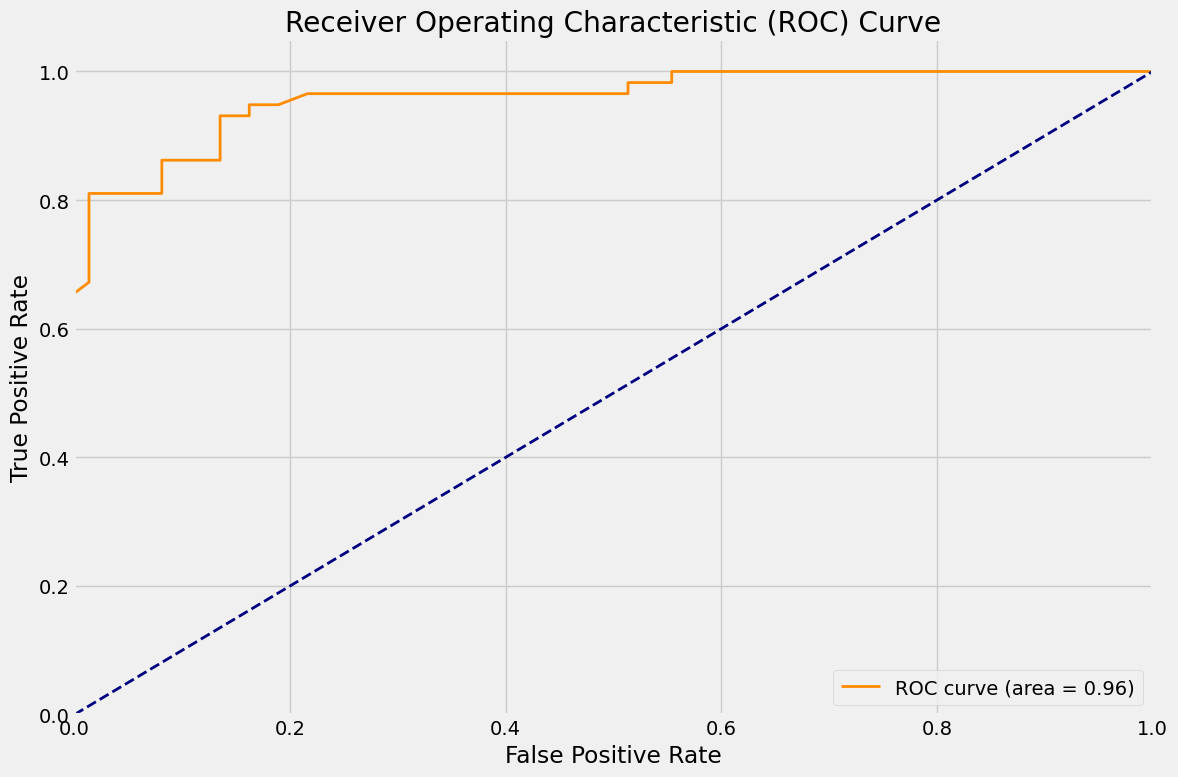

In [100]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(Y_test, Final_mod.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(Y_test, Final_mod.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Saving model

In [101]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']